In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dense, Flatten, concatenate, MultiHeadAttention, GlobalAveragePooling1D, BatchNormalization, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/THESIS/FINAL/merged_data_NEWW.csv')
# merged_data = pd.read_csv('/content/drive/MyDrive/Thesis/merged_data.csv') #file path yujin

In [ ]:
data

track_id                                 name  \
0       TRSKEXF128E078AF7C                     Morning Passages   
1       TRSKEXF128E078AF7C                     Morning Passages   
2       TRSKEXF128E078AF7C                     Morning Passages   
3       TRSKEXF128E078AF7C                     Morning Passages   
4       TRSKEXF128E078AF7C                     Morning Passages   
...                    ...                                  ...   
174055  TRUJNZX12903CF3B0A                    I Heard of a Girl   
174056  TRWCTXL128F426FD56  Dead Cities, Red Seas & Lost Ghosts   
174057  TRSKCBX128F92DFC7F                    Nasty Naughty Boy   
174058  TRESPFZ128F933704B                                On It   
174059  TRQUYSJ128F92EA2E3                         War Ensemble   

                          artist  \
0                   Philip Glass   
1                   Philip Glass   
2                   Philip Glass   
3                   Philip Glass   
4                   Philip Glass   
...                          ...   
174055                   Miss Li   
174056                       M83   
174057        Christina Aguilera   
174058  Mindless Self Indulgence   
174059                    Slayer   

                                                     tags       genre  year  \
0              instrumental, classical, soundtrack, piano     New Age  2018   
1              instrumental, classical, soundtrack, piano     New Age  2018   
2              instrumental, classical, soundtrack, piano     New Age  2018   
3              instrumental, classical, soundtrack, piano     New Age  2018   
4              instrumental, classical, soundtrack, piano     New Age  2018   
...                                                   ...         ...   ...   
174055                                       pop, swedish         Pop  2009   
174056  ambient, french, idm, dark_ambient, avant_gard...  Electronic  2004   
174057  pop, female_vocalists, jazz, soul, american, r...         Pop  2006   
174058                                   punk, industrial  Electronic  2008   
174059                   metal, heavy_metal, thrash_metal       Metal  1990   

        duration_ms  danceability  energy  key  ...  speechiness  \
0            328145         0.372   0.102    7  ...       0.0418   
1            328145         0.372   0.102    7  ...       0.0418   
2            328145         0.372   0.102    7  ...       0.0418   
3            328145         0.372   0.102    7  ...       0.0418   
4            328145         0.372   0.102    7  ...       0.0418   
...             ...           ...     ...  ...  ...          ...   
174055       165019         0.611   0.836    0  ...       0.0327   
174056      1059040         0.176   0.218    0  ...       0.0429   
174057       285106         0.367   0.744    1  ...       0.1130   
174058       181946         0.635   0.603    6  ...       0.4300   
174059       291733         0.333   0.988    1  ...       0.1540   

        acousticness  instrumentalness  liveness  valence    tempo  \
0            0.98300            0.8250    0.1840   0.0392  122.158   
1            0.98300            0.8250    0.1840   0.0392  122.158   
2            0.98300            0.8250    0.1840   0.0392  122.158   
3            0.98300            0.8250    0.1840   0.0392  122.158   
4            0.98300            0.8250    0.1840   0.0392  122.158   
...              ...               ...       ...      ...      ...   
174055       0.01420            0.0215    0.0780   0.9740  140.257   
174056       0.09780            0.9530    0.1410   0.0349  119.920   
174057       0.10400            0.0000    0.7350   0.2910  112.589   
174058       0.06710            0.0000    0.0604   0.8520  128.806   
174059       0.00008            0.0175    0.0500   0.0977   98.675   

        time_signature                                   user_id  playcount  \
0                    4  3328e8e230ff381be99d2ae2bc53fbcd929ef0aa        1.0   
1              

In [ ]:
data = data.dropna()

In [ ]:
data

track_id                                 name  \
0       TRSKEXF128E078AF7C                     Morning Passages   
1       TRSKEXF128E078AF7C                     Morning Passages   
2       TRSKEXF128E078AF7C                     Morning Passages   
3       TRSKEXF128E078AF7C                     Morning Passages   
4       TRSKEXF128E078AF7C                     Morning Passages   
...                    ...                                  ...   
174055  TRUJNZX12903CF3B0A                    I Heard of a Girl   
174056  TRWCTXL128F426FD56  Dead Cities, Red Seas & Lost Ghosts   
174057  TRSKCBX128F92DFC7F                    Nasty Naughty Boy   
174058  TRESPFZ128F933704B                                On It   
174059  TRQUYSJ128F92EA2E3                         War Ensemble   

                          artist  \
0                   Philip Glass   
1                   Philip Glass   
2                   Philip Glass   
3                   Philip Glass   
4                   Philip Glass   
...                          ...   
174055                   Miss Li   
174056                       M83   
174057        Christina Aguilera   
174058  Mindless Self Indulgence   
174059                    Slayer   

                                                     tags       genre  year  \
0              instrumental, classical, soundtrack, piano     New Age  2018   
1              instrumental, classical, soundtrack, piano     New Age  2018   
2              instrumental, classical, soundtrack, piano     New Age  2018   
3              instrumental, classical, soundtrack, piano     New Age  2018   
4              instrumental, classical, soundtrack, piano     New Age  2018   
...                                                   ...         ...   ...   
174055                                       pop, swedish         Pop  2009   
174056  ambient, french, idm, dark_ambient, avant_gard...  Electronic  2004   
174057  pop, female_vocalists, jazz, soul, american, r...         Pop  2006   
174058                                   punk, industrial  Electronic  2008   
174059                   metal, heavy_metal, thrash_metal       Metal  1990   

        duration_ms  danceability  energy  key  ...  speechiness  \
0            328145         0.372   0.102    7  ...       0.0418   
1            328145         0.372   0.102    7  ...       0.0418   
2            328145         0.372   0.102    7  ...       0.0418   
3            328145         0.372   0.102    7  ...       0.0418   
4            328145         0.372   0.102    7  ...       0.0418   
...             ...           ...     ...  ...  ...          ...   
174055       165019         0.611   0.836    0  ...       0.0327   
174056      1059040         0.176   0.218    0  ...       0.0429   
174057       285106         0.367   0.744    1  ...       0.1130   
174058       181946         0.635   0.603    6  ...       0.4300   
174059       291733         0.333   0.988    1  ...       0.1540   

        acousticness  instrumentalness  liveness  valence    tempo  \
0            0.98300            0.8250    0.1840   0.0392  122.158   
1            0.98300            0.8250    0.1840   0.0392  122.158   
2            0.98300            0.8250    0.1840   0.0392  122.158   
3            0.98300            0.8250    0.1840   0.0392  122.158   
4            0.98300            0.8250    0.1840   0.0392  122.158   
...              ...               ...       ...      ...      ...   
174055       0.01420            0.0215    0.0780   0.9740  140.257   
174056       0.09780            0.9530    0.1410   0.0349  119.920   
174057       0.10400            0.0000    0.7350   0.2910  112.589   
174058       0.06710            0.0000    0.0604   0.8520  128.806   
174059       0.00008            0.0175    0.0500   0.0977   98.675   

        time_signature                                   user_id  playcount  \
0                    4  3328e8e230ff381be99d2ae2bc53fbcd929ef0aa        1.0   
1              

In [ ]:
data.columns

Index(['track_id', 'name', 'artist', 'tags', 'genre', 'year', 'duration_ms',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'user_id', 'playcount', 'label'],
      dtype='object')

In [ ]:
label_counts_per_user = data.groupby('user_id')['label'].value_counts()
label_counts_per_user

user_id                                   label
000d80cd9b58a8f77b33aa613dcfc5cbf1daf5e8  0        10
                                          1        10
001889ee41b5f31c404a1abe4af07b2377fa776b  0        10
                                          1        10
001fd039ab4472039d22f9481bb5c5d376c3032f  0        10
                                                   ..
fff6c30c773e6ffafcac213c9afd9666afaf6d63  1        10
fffb0b218640d86e5cb99d41cd3ecad977142da5  0        10
                                          1        10
fffc0df75a48d823ad5abfaf2a1ee61eb1e3302c  0        10
                                          1        10
Name: count, Length: 17406, dtype: int64

In [ ]:
num_features = ['year', 'duration_ms','danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'key', 'mode', 'time_signature']

In [ ]:
data[num_features]

year  duration_ms  danceability  energy  loudness  speechiness  \
0       2018       328145         0.372   0.102   -22.388       0.0418   
1       2018       328145         0.372   0.102   -22.388       0.0418   
2       2018       328145         0.372   0.102   -22.388       0.0418   
3       2018       328145         0.372   0.102   -22.388       0.0418   
4       2018       328145         0.372   0.102   -22.388       0.0418   
...      ...          ...           ...     ...       ...          ...   
174055  2009       165019         0.611   0.836    -5.217       0.0327   
174056  2004      1059040         0.176   0.218   -10.831       0.0429   
174057  2006       285106         0.367   0.744    -4.980       0.1130   
174058  2008       181946         0.635   0.603    -4.106       0.4300   
174059  1990       291733         0.333   0.988    -4.117       0.1540   

        acousticness  instrumentalness  liveness  valence    tempo  key  mode  \
0            0.98300            0.8250    0.1840   0.0392  122.158    7     0   
1            0.98300            0.8250    0.1840   0.0392  122.158    7     0   
2            0.98300            0.8250    0.1840   0.0392  122.158    7     0   
3            0.98300            0.8250    0.1840   0.0392  122.158    7     0   
4            0.98300            0.8250    0.1840   0.0392  122.158    7     0   
...              ...               ...       ...      ...      ...  ...   ...   
174055       0.01420            0.0215    0.0780   0.9740  140.257    0     1   
174056       0.09780            0.9530    0.1410   0.0349  119.920    0     1   
174057       0.10400            0.0000    0.7350   0.2910  112.589    1     1   
174058       0.06710            0.0000    0.0604   0.8520  128.806    6     1   
174059       0.00008            0.0175    0.0500   0.0977   98.675    1     1   

        time_signature  
0                    4  
1                    4  
2                    4  
3                    4  
4                    4  
...                ...  
174055               4  
174056               4  
174057               3  
174058               4  
174059               4  

[174060 rows x 14 columns]

In [ ]:
data.isnull().sum()

track_id            0
name                0
artist              0
tags                0
genre               0
year                0
duration_ms         0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
user_id             0
playcount           0
label               0
dtype: int64

# Music Data Preparation

In [ ]:
merged_data = data.copy()

#### Label Encoder

In [ ]:
#track_id
encoder_track_id = LabelEncoder()
merged_data.loc[:, 'track_id'] = encoder_track_id.fit_transform(merged_data['track_id'])

In [ ]:
data['track_id']

0         TRSKEXF128E078AF7C
1         TRSKEXF128E078AF7C
2         TRSKEXF128E078AF7C
3         TRSKEXF128E078AF7C
4         TRSKEXF128E078AF7C
                 ...        
174055    TRUJNZX12903CF3B0A
174056    TRWCTXL128F426FD56
174057    TRSKCBX128F92DFC7F
174058    TRESPFZ128F933704B
174059    TRQUYSJ128F92EA2E3
Name: track_id, Length: 174060, dtype: object

In [ ]:
merged_data['track_id']

0         3726
1         3726
2         3726
3         3726
4         3726
          ... 
174055    4104
174056    4424
174057    3723
174058    1030
174059    3404
Name: track_id, Length: 174060, dtype: object

In [ ]:
#artist
encoder_artist = LabelEncoder()
merged_data.loc[:, 'artist'] = encoder_artist.fit_transform(merged_data['artist'])

In [ ]:
data['artist']

0                     Philip Glass
1                     Philip Glass
2                     Philip Glass
3                     Philip Glass
4                     Philip Glass
                    ...           
174055                     Miss Li
174056                         M83
174057          Christina Aguilera
174058    Mindless Self Indulgence
174059                      Slayer
Name: artist, Length: 174060, dtype: object

In [ ]:
merged_data['artist']

0         1203
1         1203
2         1203
3         1203
4         1203
          ... 
174055    1040
174056     956
174057     344
174058    1033
174059    1381
Name: artist, Length: 174060, dtype: object

In [ ]:
#genre
encoder_genre = LabelEncoder()
merged_data.loc[:, 'genre'] = encoder_genre.fit_transform(merged_data['genre'])

In [ ]:
print(data['genre'].unique())

['New Age' 'Pop' 'Metal' 'Blues' 'Latin' 'World' 'RnB' 'Reggae'
 'Electronic' 'Rock' 'Punk' 'Country']


In [ ]:
print(merged_data['genre'].unique())

[5 6 4 0 3 11 9 8 2 10 7 1]


In [ ]:
merged_data['genre']

0         5
1         5
2         5
3         5
4         5
         ..
174055    6
174056    2
174057    6
174058    2
174059    4
Name: genre, Length: 174060, dtype: object

In [ ]:
#tags
merged_data['tags'] = merged_data['tags'].str.split(',')
all_tags = [tag.strip() for tags in merged_data['tags'] for tag in tags]

In [ ]:
encoder_tags = LabelEncoder()
encoder_tags.fit(all_tags)
merged_data['tags'] = merged_data['tags'].apply(lambda x: encoder_tags.transform([tag.strip() for tag in x]))

In [ ]:
data['tags']

0                instrumental, classical, soundtrack, piano
1                instrumental, classical, soundtrack, piano
2                instrumental, classical, soundtrack, piano
3                instrumental, classical, soundtrack, piano
4                instrumental, classical, soundtrack, piano
                                ...                        
174055                                         pop, swedish
174056    ambient, french, idm, dark_ambient, avant_gard...
174057    pop, female_vocalists, jazz, soul, american, r...
174058                                     punk, industrial
174059                     metal, heavy_metal, thrash_metal
Name: tags, Length: 174060, dtype: object

In [ ]:
merged_data['tags']

0                   [53, 20, 92, 69]
1                   [53, 20, 92, 69]
2                   [53, 20, 92, 69]
3                   [53, 20, 92, 69]
4                   [53, 20, 92, 69]
                     ...            
174055                      [71, 93]
174056       [8, 35, 48, 24, 10, 64]
174057    [71, 33, 56, 91, 9, 85, 0]
174058                      [81, 52]
174059                  [62, 45, 97]
Name: tags, Length: 174060, dtype: object

In [ ]:
max_len_tags = max(len(seq) for seq in merged_data['tags'])

In [ ]:
print(f"Maximum Length of Tags Sequences: {max_len_tags}")

Maximum Length of Tags Sequences: 24


#### Tokenizer

In [ ]:
#name (song title)
name_tokenizer = Tokenizer()
name_tokenizer.fit_on_texts(merged_data['name'])
merged_data['name'] = name_tokenizer.texts_to_sequences(merged_data['name'])

In [ ]:
data['name']

0                            Morning Passages
1                            Morning Passages
2                            Morning Passages
3                            Morning Passages
4                            Morning Passages
                         ...                 
174055                      I Heard of a Girl
174056    Dead Cities, Red Seas & Lost Ghosts
174057                      Nasty Naughty Boy
174058                                  On It
174059                           War Ensemble
Name: name, Length: 174060, dtype: object

In [ ]:
merged_data['name']

0                            [190, 4594]
1                            [190, 4594]
2                            [190, 4594]
3                            [190, 4594]
4                            [190, 4594]
                       ...              
174055               [4, 1134, 2, 5, 35]
174056    [61, 901, 120, 1373, 107, 576]
174057                  [2921, 2922, 98]
174058                          [14, 15]
174059                       [150, 1084]
Name: name, Length: 174060, dtype: object

In [ ]:
max_len_name = max(len(seq) for seq in merged_data['name'])
num_unique_names = len(name_tokenizer.word_index) + 1

In [ ]:
print(f"Maximum Length of Name Sequences: {max_len_name}")
print(f"Number of Unique Names: {num_unique_names}")

Maximum Length of Name Sequences: 19
Number of Unique Names: 5315


#### Min Max

In [ ]:
scaler = MinMaxScaler()
merged_data[num_features] = scaler.fit_transform(merged_data[num_features])

In [ ]:
data[num_features].value_counts()

year  duration_ms  danceability  energy  loudness  speechiness  acousticness  instrumentalness  liveness  valence  tempo    key  mode  time_signature
2007  196200       0.688         0.870   -5.193    0.0405       0.000254      0.235000          0.0355    0.9270   121.521  1    1     4                 688
      249000       0.712         0.814   -4.056    0.0822       0.018100      0.820000          0.2030    0.5560   125.231  11   0     4                 637
2012  63080        0.531         0.360   -8.575    0.1080       0.822000      0.000000          0.1780    0.7010   97.200   10   0     4                 600
2010  274800       0.626         0.800   -6.777    0.0435       0.000582      0.001140          0.3740    0.3530   98.995   11   0     4                 552
2005  237120       0.729         0.940   -4.933    0.0382       0.084500      0.000262          0.0963    0.9660   113.804  4    1     4                 522
                                                                                                                                                        ... 
1990  382533       0.364         0.414   -14.011   0.0298       0.146000      0.000001          0.0975    0.4580   139.116  4    0     4                   8
2007  204160       0.673         0.720   -4.924    0.0272       0.109000      0.000000          0.1190    0.5050   97.009   9    0     4                   8
2006  247320       0.656         0.810   -9.758    0.0437       0.878000      0.814000          0.1000    0.2280   127.913  0    1     4                   7
2011  155986       0.844         0.343   -11.758   0.1680       0.466000      0.000418          0.1320    0.6420   77.941   10   1     4                   7
2001  134546       0.143         0.483   -11.818   0.0355       0.000296      0.909000          0.6290    0.0392   159.733  10   0     5                   7
Name: count, Length: 5172, dtype: int64

In [ ]:
merged_data[num_features].value_counts()

year      duration_ms  danceability  energy    loudness  speechiness  acousticness  instrumentalness  liveness  valence   tempo     key       mode  time_signature
0.899160  0.134381     0.690699      0.869997  0.867267  0.021514     0.000255      0.236419          0.016010  0.938885  0.462204  0.090909  1.0   0.75              688
          0.177762     0.717116      0.813996  0.893582  0.069489     0.018173      0.824950          0.190145  0.560993  0.482456  1.000000  0.0   0.75              637
0.941176  0.025010     0.517887      0.359987  0.788993  0.099172     0.825301      0.000000          0.164154  0.708686  0.329441  0.909091  0.0   0.75              600
0.924370  0.198959     0.622455      0.799996  0.830606  0.024965     0.000584      0.001147          0.367918  0.354221  0.339240  1.000000  0.0   0.75              552
0.882353  0.168001     0.735828      0.939999  0.873284  0.018868     0.084839      0.000264          0.079218  0.978610  0.420078  0.363636  1.0   0.75              522
                                                                                                                                                                     ... 
0.756303  0.287473     0.334067      0.413988  0.663180  0.009204     0.146586      0.000001          0.080466  0.461172  0.558250  0.363636  0.0   0.75                8
0.899160  0.140921     0.674188      0.719994  0.873493  0.006213     0.109438      0.000000          0.102817  0.509045  0.328399  0.818182  0.0   0.75                8
0.890756  0.176382     0.655476      0.809996  0.761613  0.025196     0.881526      0.818913          0.083065  0.226899  0.497096  0.000000  1.0   0.75                7
0.932773  0.101341     0.862411      0.342987  0.715324  0.168201     0.467871      0.000421          0.116332  0.648590  0.224311  0.909091  1.0   0.75                7
0.848739  0.083726     0.090809      0.482990  0.713935  0.015762     0.000297      0.914487          0.633018  0.034591  0.670793  0.909091  0.0   1.00                7
Name: count, Length: 5172, dtype: int64

In [ ]:
merged_data[num_features]

year  duration_ms  danceability    energy  loudness  speechiness  \
0       0.991597     0.242788      0.342873  0.101982  0.469299     0.023010   
1       0.991597     0.242788      0.342873  0.101982  0.469299     0.023010   
2       0.991597     0.242788      0.342873  0.101982  0.469299     0.023010   
3       0.991597     0.242788      0.342873  0.101982  0.469299     0.023010   
4       0.991597     0.242788      0.342873  0.101982  0.469299     0.023010   
...          ...          ...           ...       ...       ...          ...   
174055  0.915966     0.108763      0.605944  0.835997  0.866711     0.012540   
174056  0.873950     0.843293      0.127133  0.217984  0.736779     0.024275   
174057  0.890756     0.207427      0.337369  0.743995  0.872197     0.104924   
174058  0.907563     0.122670      0.632361  0.602992  0.892425     0.469627   
174059  0.756303     0.212872      0.299945  0.988000  0.892170     0.152094   

        acousticness  instrumentalness  liveness   valence     tempo  \
0           0.986948          0.829980  0.170392  0.034591  0.465681   
1           0.986948          0.829980  0.170392  0.034591  0.465681   
2           0.986948          0.829980  0.170392  0.034591  0.465681   
3           0.986948          0.829980  0.170392  0.034591  0.465681   
4           0.986948          0.829980  0.170392  0.034591  0.465681   
...              ...               ...       ...       ...       ...   
174055      0.014257          0.021630  0.060193  0.986758  0.564479   
174056      0.098193          0.958753  0.125689  0.030211  0.453464   
174057      0.104418          0.000000  0.743217  0.291069  0.413446   
174058      0.067369          0.000000  0.041896  0.862492  0.501971   
174059      0.000081          0.017606  0.031084  0.094178  0.337493   

             key  mode  time_signature  
0       0.636364   0.0            0.75  
1       0.636364   0.0            0.75  
2       0.636364   0.0            0.75  
3       0.636364   0.0            0.75  
4       0.636364   0.0            0.75  
...          ...   ...             ...  
174055  0.000000   1.0            0.75  
174056  0.000000   1.0            0.75  
174057  0.090909   1.0            0.50  
174058  0.545455   1.0            0.75  
174059  0.090909   1.0            0.75  

[174060 rows x 14 columns]

In [ ]:
num_feat_len = len(num_features)

In [ ]:
print(f"Numerical Features Length: {num_feat_len}")

Numerical Features Length: 14


In [ ]:
num_unique_track_id = len(encoder_track_id.classes_)
num_unique_artists = len(encoder_artist.classes_)
num_unique_genre = len(encoder_genre.classes_)
num_unique_tags = len(encoder_tags.classes_)
# num_unique_image = len({tuple(embedding) for embedding in merged_data['image_embedding']})

In [ ]:
print(f"Number of Unique Track IDs: {num_unique_track_id}")
print(f"Number of Unique Artists: {num_unique_artists}")
print(f"Number of Unique Genres: {num_unique_genre}")
print(f"Number of Unique Tags: {num_unique_tags}")
# print(f"Number of Unique Image: {num_unique_image}")

Number of Unique Track IDs: 5172
Number of Unique Artists: 1852
Number of Unique Genres: 12
Number of Unique Tags: 100


# User Data Preparation

In [ ]:
encoder_user_id = LabelEncoder()
merged_data['user_id'] = encoder_user_id.fit_transform(merged_data['user_id'])

In [ ]:
scaler = MinMaxScaler()
merged_data['playcount'] = scaler.fit_transform(merged_data['playcount'].values.reshape(-1, 1))

In [ ]:
data[['user_id', 'playcount']]

user_id  playcount
0       3328e8e230ff381be99d2ae2bc53fbcd929ef0aa        1.0
1       e5f7b81e82de93172cdb72cd12a85fe8d6703c13        2.0
2       600d8bd542313808a3641305d19a58b64281ad6b        1.0
3       d644d87ee7fab84b1a135d99e9bd7fa2fcdd7717        1.0
4       6ffcf4c6c26321482cdbd890c6198152673103aa        1.0
...                                          ...        ...
174055  aebe9984fb32fb2bced3006d2655c8eb4337d761        0.0
174056  aebe9984fb32fb2bced3006d2655c8eb4337d761        0.0
174057  aebe9984fb32fb2bced3006d2655c8eb4337d761        0.0
174058  aebe9984fb32fb2bced3006d2655c8eb4337d761        0.0
174059  aebe9984fb32fb2bced3006d2655c8eb4337d761        0.0

[174060 rows x 2 columns]

In [ ]:
merged_data[['user_id', 'playcount']]

user_id  playcount
0          1713   0.002198
1          7838   0.004396
2          3249   0.002198
3          7306   0.002198
4          3791   0.002198
...         ...        ...
174055     5960   0.000000
174056     5960   0.000000
174057     5960   0.000000
174058     5960   0.000000
174059     5960   0.000000

[174060 rows x 2 columns]

In [ ]:
num_unique_user_id = len(encoder_user_id.classes_)

In [ ]:
print(f"Number of Unique User IDs: {num_unique_user_id}")

Number of Unique User IDs: 8703


# DATA PREP

In [ ]:
from tensorflow.keras import regularizers

### Train and Test Data

In [ ]:
merged_data['user_label'] = merged_data['user_id'].astype(str) + '_' + merged_data['label'].astype(str)

In [ ]:
X_item = merged_data[['track_id', 'name', 'artist', 'tags', 'genre'] + num_features]
X_user = merged_data[['user_id', 'playcount']]
y = merged_data[['label', 'user_label']]

In [ ]:
X = pd.concat([X_item, X_user], axis=1)

In [ ]:
y

label user_label
0           1     1713_1
1           1     7838_1
2           1     3249_1
3           1     7306_1
4           1     3791_1
...       ...        ...
174055      0     5960_0
174056      0     5960_0
174057      0     5960_0
174058      0     5960_0
174059      0     5960_0

[174060 rows x 2 columns]

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y['user_label']
)

In [ ]:
train_users = set(X_train['user_id'])
train_items = set(X_train['track_id'])

temp_users = set(X_temp['user_id'])
temp_items = set(X_temp['track_id'])

In [ ]:
assert temp_users.issubset(train_users), "Some users in the temp set are not in the training set!"
assert temp_items.issubset(train_items), "Some items in the temp set are not in the training set!"

In [ ]:
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp['user_label']
)

In [ ]:
y_train = y_train.drop(columns=['user_label'])
y_test = y_test.drop(columns=['user_label'])
y_val = y_val.drop(columns=['user_label'])

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("y_val shape:", y_val.shape)

X_train shape: (104436, 21)
X_test shape: (34812, 21)
X_val shape: (34812, 21)
y_train shape: (104436, 1)
y_test shape: (34812, 1)
y_val shape: (34812, 1)


In [ ]:
train_data = X_train.copy()
train_data['label'] = y_train

test_data = X_test.copy()
test_data['label'] = y_test

val_data = X_val.copy()
val_data['label'] = y_val

In [ ]:
train_distribution = train_data.groupby(['user_id', 'label']).size().unstack(fill_value=0)
print("Training set distribution:\n", train_distribution)

test_distribution = test_data.groupby(['user_id', 'label']).size().unstack(fill_value=0)
print("Testing set distribution:\n", test_distribution)

val_distribution = val_data.groupby(['user_id', 'label']).size().unstack(fill_value=0)
print("Validation set distribution:\n", val_distribution)

Training set distribution:
 label    0  1
user_id      
0        6  6
1        6  6
2        6  6
3        6  6
4        6  6
...     .. ..
8698     6  6
8699     6  6
8700     6  6
8701     6  6
8702     6  6

[8703 rows x 2 columns]
Testing set distribution:
 label    0  1
user_id      
0        2  2
1        2  2
2        2  2
3        2  2
4        2  2
...     .. ..
8698     2  2
8699     2  2
8700     2  2
8701     2  2
8702     2  2

[8703 rows x 2 columns]
Validation set distribution:
 label    0  1
user_id      
0        2  2
1        2  2
2        2  2
3        2  2
4        2  2
...     .. ..
8698     2  2
8699     2  2
8700     2  2
8701     2  2
8702     2  2

[8703 rows x 2 columns]


In [ ]:
X_train_track_id = np.array(X_train['track_id']).astype('int32')
X_test_track_id = np.array(X_test['track_id']).astype('int32')
X_val_track_id = np.array(X_val['track_id']).astype('int32')

X_train_name = pad_sequences(X_train['name'], maxlen=max_len_name)
X_test_name = pad_sequences(X_test['name'], maxlen=max_len_name)
X_val_name = pad_sequences(X_val['name'], maxlen=max_len_name)

X_train_artist = np.array(X_train['artist']).astype('int32')
X_test_artist = np.array(X_test['artist']).astype('int32')
X_val_artist = np.array(X_val['artist']).astype('int32')

X_train_tags = pad_sequences(X_train['tags'], maxlen=max_len_tags)
X_test_tags = pad_sequences(X_test['tags'], maxlen=max_len_tags)
X_val_tags = pad_sequences(X_val['tags'], maxlen=max_len_tags)

X_train_genre = np.array(X_train['genre']).astype('int32')
X_test_genre = np.array(X_test['genre']).astype('int32')
X_val_genre = np.array(X_val['genre']).astype('int32')

X_train_num_feats = np.array(X_train[num_features])
X_test_num_feats = np.array(X_test[num_features])
X_val_num_feats = np.array(X_val[num_features])

X_train_user_id = np.array(X_train['user_id']).astype('int32')
X_test_user_id = np.array(X_test['user_id']).astype('int32')
X_val_user_id = np.array(X_val['user_id']).astype('int32')

X_train_playcount= np.array(X_train['playcount'])
X_test_playcount = np.array(X_test['playcount'])
X_val_playcount = np.array(X_val['playcount'])

In [ ]:
y_train = np.array(y_train).astype('int32')
y_test = np.array(y_test).astype('int32')
y_val = np.array(y_val).astype('int32')

In [ ]:
print(type(X_train_track_id))
print(type(X_train_name))
print(type(X_train_artist))
print(type(X_train_tags))
print(type(X_train_genre))
print(type(X_train_num_feats))
print(type(X_train_user_id))
print(type(X_train_playcount))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
print("X_train_track_id shape:", X_train_track_id.shape)
print("X_train_name_pad shape:", X_train_name.shape)
print("X_train_artist shape:", X_train_artist.shape)
print("X_train_tags shape:", X_train_tags.shape)
print("X_train_genre shape:", X_train_genre.shape)
print("X_train_num_feats shape:", X_train_num_feats.shape)
print("X_train_user_id shape:", X_train_user_id.shape)
print("X_train_playcount shape:", X_train_playcount.shape)
print("y_train shape:", y_train.shape)

X_train_track_id shape: (104436,)
X_train_name_pad shape: (104436, 19)
X_train_artist shape: (104436,)
X_train_tags shape: (104436, 24)
X_train_genre shape: (104436,)
X_train_num_feats shape: (104436, 14)
X_train_user_id shape: (104436,)
X_train_playcount shape: (104436,)
y_train shape: (104436, 1)


In [ ]:
print("Data Types:")
print("Track ID:", X_train_track_id.dtype)
print("Name:", X_train_name.dtype)
print("Artist:", X_train_artist.dtype)
print("Tags:", X_train_tags.dtype)
print("Genre:", X_train_genre.dtype)
print("Num Feats:", X_train_num_feats.dtype)
print("User IDs:", X_train_user_id.dtype)
print("Playcount:", X_train_playcount.dtype)
print("Label:", y_train.dtype)

Data Types:
Track ID: int32
Name: int32
Artist: int32
Tags: int32
Genre: int32
Num Feats: float64
User IDs: int32
Playcount: float64
Label: int32


## MODEL

In [ ]:
from keras.utils import plot_model

### Item Tower

In [ ]:
# #inputs layers
# track_id_input = Input(shape=(1,), name='track_id_input_layer')
# name_input = Input(shape=(max_len_name,), name='name_input_layer')
# artist_input = Input(shape=(1,), name='artist_input_layer')
# tags_input = Input(shape=(max_len_tags,), name='tags_input_layer')
# genre_input = Input(shape=(1,), name='genre_input_layer')
# num_features_input = Input(shape=(num_feat_len,), name='num_features_input_layer')

In [ ]:
# def item_tower(inputs):
#     track_id_input, name_input, artist_input, tags_input, genre_input, num_features_input = inputs

#     track_id_embedding = Flatten(name='track_id_flatten')(
#         Embedding(input_dim=num_unique_track_id, output_dim=32,
#                   embeddings_regularizer=regularizers.l2(1e-3), name='track_id_embedding')(track_id_input))

#     name_embedding = Flatten(name='name_flatten')(
#         Embedding(input_dim=num_unique_names, output_dim=32,
#                   embeddings_regularizer=regularizers.l2(1e-3), name='name_embedding')(name_input))

#     artist_embedding = Flatten(name='artist_flatten')(
#         Embedding(input_dim=num_unique_artists, output_dim=32,
#                   embeddings_regularizer=regularizers.l2(1e-3), name='artist_embedding')(artist_input))

#     tags_embedding = Flatten(name='tags_flatten')(
#         Embedding(input_dim=num_unique_tags, output_dim=32,
#                   embeddings_regularizer=regularizers.l2(1e-3), name='tags_embedding')(tags_input))

#     genre_embedding = Flatten(name='genre_flatten')(
#         Embedding(input_dim=num_unique_genre, output_dim=32,
#                   embeddings_regularizer=regularizers.l2(1e-3), name='genre_embedding')(genre_input))

#     numerical_dense = Dense(32, activation='relu',
#                             kernel_regularizer=regularizers.l2(1e-3), name='numerical_dense')(num_features_input)

#     # Concatenation
#     concatenated = concatenate([track_id_embedding, name_embedding, artist_embedding, tags_embedding, genre_embedding, numerical_dense], name='item_concatenated')

#     # Connected Layers + Regularization
#     dense1 = Dense(64, activation='relu',
#                    kernel_regularizer=regularizers.l2(1e-3), name='item_dense1')(concatenated)
#     norm = BatchNormalization(name='item_norm')(dense1)
#     norm = Dropout(0.75, name='item_dropout')(norm)
#     item_embedding = Dense(32, activation='relu',
#                    kernel_regularizer=regularizers.l2(1e-3), name='item_embedding')(norm)

#     return item_embedding

In [ ]:
# item_tower_output = item_tower([track_id_input, name_input, artist_input, tags_input, genre_input, num_features_input])

In [ ]:
# item_model = Model(inputs=[track_id_input, name_input, artist_input, tags_input, genre_input, num_features_input], outputs=item_tower_output, name='item_tower')

In [ ]:
# item_model.summary()

In [ ]:
# plot_model(item_model, to_file='item_model.png', show_shapes=True, show_layer_names=True)

### User Tower

In [ ]:
# #user input layer
# user_id_input = Input(shape=(1,), name='user_id_input_layer')
# playcount_input = Input(shape=(1,), name='playcount_input_layer')

In [ ]:
# def user_tower(inputs):
#     user_id_input, playcount_input = inputs

#     x_user_id = Flatten(name='user_flatten')(Embedding(input_dim=num_unique_user_id, output_dim=16,
#                           embeddings_regularizer=regularizers.l2(1e-3), name='user_id_embedding')(user_id_input))

#     x_user = concatenate([x_user_id, playcount_input], name='user_concatenated')

#     x_user = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-3), name='user_dense')(x_user)
#     x_norm = BatchNormalization(name='user_norm')(x_user)
#     x_norm = Dropout(0.7, name='user_dropout')(x_norm)
#     user_embedding = Dense(32, activation='relu', kernel_regularizer=regularizers.l2(1e-3), name='user_embedding')(x_norm)

#     return user_embedding

In [ ]:
# user_tower_output = user_tower([user_id_input, playcount_input])

In [ ]:
# user_model = Model(inputs=[user_id_input, playcount_input], outputs=user_tower_output, name='user_tower')

In [ ]:
# user_model.summary()

In [ ]:
# plot_model(user_model, to_file='user_model.png', show_shapes=True, show_layer_names=True)

### Similarity

In [ ]:
from keras.layers import Layer
import tensorflow as tf
from tensorflow.keras.saving import register_keras_serializable

In [ ]:
register_keras_serializable() # Register SimilarityLayer
class SimilarityLayer(Layer):
    def call(self, inputs):
        item_embedding, user_embedding = inputs
        item_norm = tf.sqrt(tf.reduce_sum(tf.square(item_embedding), axis=1, keepdims=True), name='item_norm')
        user_norm = tf.sqrt(tf.reduce_sum(tf.square(user_embedding), axis=1, keepdims=True), name='user_norm')

        normalized_item = item_embedding / item_norm
        normalized_user = user_embedding / user_norm

        similarity = tf.reduce_sum(normalized_item * normalized_user, axis=1, keepdims=True, name='similarity')

        return similarity

## Model

In [ ]:
# from tensorflow.keras.models import load_model

# model = load_model('/content/drive/MyDrive/THESIS/FINAL/two_tower_model.h5')

In [ ]:
# item_embedding = item_tower([track_id_input, name_input, artist_input, tags_input, genre_input, num_features_input])
# user_embedding = user_tower([user_id_input, playcount_input])

# item_norm = BatchNormalization(name='item_norm2')(item_embedding)
# user_norm = BatchNormalization(name='user_norm2')(user_embedding)

# similarity = SimilarityLayer(name='similarity')([item_norm, user_norm])

In [ ]:
# print("Item Embedding Shape:", item_embedding.shape)
# print("User Embedding Shape:", user_embedding.shape)
# print("Similarity Shape:", similarity.shape)

In [ ]:
# from tensorflow.keras.optimizers import Adam

# optimizer = Adam(learning_rate=1e-4)

In [ ]:
# model = Model(inputs=[track_id_input, name_input, artist_input, tags_input, genre_input, num_features_input,
#                       user_id_input, playcount_input],
#               outputs=similarity, name='Two_Tower_Model')

# model.compile(optimizer=optimizer, loss='binary_crossentropy')

In [ ]:
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# model.summary()

In [ ]:
# from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# reduce_lr = ReduceLROnPlateau(
#     monitor='val_loss',
#     factor=0.5,
#     patience=3,
#     min_lr=1e-5
# )

# early_stopping = EarlyStopping(
#     monitor='val_loss',
#     patience=3,
#     restore_best_weights=True
# )

In [ ]:
# history = model.fit(
#     [X_train_track_id, X_train_name, X_train_artist, X_train_tags, X_train_genre, X_train_num_feats, X_train_user_id, X_train_playcount],
#     y_train,
#     epochs=50,
#     batch_size=32,
#     validation_data=([X_val_track_id, X_val_name, X_val_artist, X_val_tags, X_val_genre, X_val_num_feats, X_val_user_id, X_val_playcount], y_val),
#     callbacks=[reduce_lr, early_stopping]
# )

In [ ]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(12, 6))


# plt.subplot(1, 2, 1)
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Two Tower Model Loss')
# plt.legend()

# hyperparameter tuning

In [ ]:
# pip install keras-tuner

In [ ]:
# from keras_tuner import HyperModel, HyperParameters, RandomSearch
# from tensorflow.keras import layers, models, regularizers

In [ ]:
# #inputs layers
# track_id_input = Input(shape=(1,), name='track_id_input_layer')
# name_input = Input(shape=(max_len_name,), name='name_input_layer')
# artist_input = Input(shape=(1,), name='artist_input_layer')
# tags_input = Input(shape=(max_len_tags,), name='tags_input_layer')
# genre_input = Input(shape=(1,), name='genre_input_layer')
# num_features_input = Input(shape=(num_feat_len,), name='num_features_input_layer')

In [ ]:
# max_len_name, max_len_tags, num_feat_len

In [ ]:
# class SimilarityModel(HyperModel):
#     def build(self, hp):
#         # Inputs
#         track_id_input = Input(shape=(1,), name='track_id_input_layer')
#         name_input = Input(shape=(max_len_name,), name='name_input_layer')
#         artist_input = Input(shape=(1,), name='artist_input_layer')
#         tags_input = Input(shape=(max_len_tags,), name='tags_input_layer')
#         genre_input = Input(shape=(1,), name='genre_input_layer')
#         num_features_input = Input(shape=(num_feat_len,), name='num_features_input_layer')

#         user_id_input = Input(shape=(1,), name='user_id_input_layer')
#         playcount_input = Input(shape=(1,), name='playcount_input_layer')

#         # Item Tower
#         track_id_embedding = Flatten()(Embedding(input_dim=num_unique_track_id,
#                                                  output_dim=hp.Choice('track_id_embedding_dim', [16, 32, 64]),
#                                                  embeddings_regularizer=regularizers.l2(1e-3))(track_id_input))
#         name_embedding = Flatten()(Embedding(input_dim=num_unique_names,
#                                              output_dim=hp.Choice('name_embedding_dim', [16, 32, 64]),
#                                              embeddings_regularizer=regularizers.l2(1e-3))(name_input))
#         artist_embedding = Flatten()(Embedding(input_dim=num_unique_artists,
#                                                output_dim=hp.Choice('artist_embedding_dim', [16, 32, 64]),
#                                                embeddings_regularizer=regularizers.l2(1e-3))(artist_input))
#         tags_embedding = Flatten()(Embedding(input_dim=num_unique_tags,
#                                              output_dim=hp.Choice('tags_embedding_dim', [16, 32, 64]),
#                                              embeddings_regularizer=regularizers.l2(1e-3))(tags_input))
#         genre_embedding = Flatten()(Embedding(input_dim=num_unique_genre,
#                                               output_dim=hp.Choice('genre_embedding_dim', [16, 32, 64]),
#                                               embeddings_regularizer=regularizers.l2(1e-3))(genre_input))

#         numerical_dense = Dense(hp.Int('num_dense_units', min_value=16, max_value=128, step=16),
#                                 activation='relu',
#                                 kernel_regularizer=regularizers.l2(1e-3))(num_features_input)

#         # Concatenation of item embeddings
#         concatenated = concatenate([track_id_embedding, name_embedding, artist_embedding, tags_embedding, genre_embedding, numerical_dense])

#         # Dense Layers for Item Tower
#         dense1 = Dense(hp.Int('item_dense1_units', min_value=16, max_value=128, step=16), activation='relu')(concatenated)
#         norm = BatchNormalization()(dense1)
#         norm = Dropout(hp.Float('item_dropout_rate', min_value=0.2, max_value=0.75, step=0.05))(norm)
#         item_embedding = Dense(hp.Int('final_dense_units', min_value=16, max_value=128, step=16), activation='relu')(norm)

#         # User Tower
#         x_user_id = Flatten()(Embedding(input_dim=num_unique_user_id,
#                                         output_dim=hp.Choice('user_id_embedding_dim', [16, 32, 64]),
#                                         embeddings_regularizer=regularizers.l2(1e-3))(user_id_input))
#         x_user = concatenate([x_user_id, playcount_input])
#         x_user = Dense(hp.Int('user_dense_units', min_value=16, max_value=128, step=16), activation='relu')(x_user)
#         x_norm = BatchNormalization()(x_user)
#         x_norm = Dropout(hp.Float('user_dropout_rate', min_value=0.2, max_value=0.75, step=0.05))(x_norm)
#         user_embedding = Dense(hp.Int('final_dense_units', min_value=16, max_value=128, step=16), activation='relu')(x_norm)

#         # Similarity Layer
#         item_norm = BatchNormalization()(item_embedding)
#         user_norm = BatchNormalization()(user_embedding)
#         similarity = SimilarityLayer()(inputs=[item_norm, user_norm])

#         optimizer_tune = tf.keras.optimizers.Adam(
#             learning_rate=hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="log")
#         )

#         # Create model
#         model = Model(inputs=[track_id_input, name_input, artist_input, tags_input, genre_input, num_features_input, user_id_input, playcount_input],
#                       outputs=similarity)

#         # Compile model
#         model.compile(optimizer=optimizer_tune, loss='binary_crossentropy')

#         return model

In [ ]:
# tuner = RandomSearch(
#     SimilarityModel(),
#     objective='val_loss',
#     max_trials=10,
#     executions_per_trial=1,
#     directory='tuner_dir',
#     overwrite=True,
#     project_name='similarity_model_tuning'
# )

In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping
# early_stopping = EarlyStopping(
#     monitor='val_loss',
#     patience=3,
#     restore_best_weights=True
# )

In [ ]:
# tuner.search(
#     x=[X_train_track_id, X_train_name, X_train_artist, X_train_tags, X_train_genre, X_train_num_feats, X_train_user_id, X_train_playcount],
#     y=y_train,
#     epochs=20,
#     batch_size=32,
#     validation_data=(
#         [X_val_track_id, X_val_name, X_val_artist, X_val_tags, X_val_genre, X_val_num_feats, X_val_user_id, X_val_playcount],
#         y_val
#     ),
#     callbacks=[early_stopping]
# )

In [ ]:
# tuner.search(
#     x=[X_train_track_id, X_train_name, X_train_artist, X_train_tags, X_train_genre, X_train_num_feats, X_train_user_id, X_train_playcount],
#     y=y_train,
#     epochs=20,
#     batch_size=32,
#     validation_data=(
#         [X_val_track_id, X_val_name, X_val_artist, X_val_tags, X_val_genre, X_val_num_feats, X_val_user_id, X_val_playcount],
#         y_val
#     ),
#     callbacks=[early_stopping]
# )

In [ ]:
# import shutil
# from google.colab import files

# shutil.make_archive('tuner_dir', 'zip', 'tuner_dir')
# files.download('tuner_dir.zip')

In [ ]:
# model.save('/content/drive/MyDrive/THESIS/FINAL/two_tower_model.h5')
# # model.save('/content/drive/MyDrive/Thesis/Model/two_tower_model.h5') #yujin

In [ ]:
# model.save('/content/drive/MyDrive/THESIS/FINAL/two_tower_model.keras')
# # model.save('/content/drive/MyDrive/Thesis/Model/two_tower_model.keras') #yujin

In [ ]:
# import pickle

# with open('/content/drive/MyDrive/THESIS/FINAL/two_tower_history.pkl', 'wb') as f:
# # with open('/content/drive/MyDrive/Thesis/Model/two_tower_history.pkl', 'wb') as f: #yujin
#     pickle.dump(history.history, f)

# EVALUATION

In [ ]:
# for layer in model.layers:
#     print(layer.name)

In [ ]:
# user_embedding_layer = model.get_layer('user_norm2')
# user_embedding_model = Model(inputs=user_model.input, outputs=user_embedding_layer.output)

In [ ]:
# def get_user_embedding(user_id):

#     filtered_data = merged_data[merged_data['user_id'] == user_id]
#     user_input = [
#         np.array(filtered_data['user_id']).astype('int32'),
#         np.array(filtered_data['playcount']).astype('float32')
#     ]

#     user_embedding = user_embedding_model.predict(user_input)
#     user_embedding_norm = user_embedding / np.linalg.norm(user_embedding)
#     return user_embedding_norm

In [ ]:
# user_embedding_for_1713 = get_user_embedding(1713)
# print("User Embedding for User ID 1713:", user_embedding_for_1713)

In [ ]:
# user_embedding_for_1713.shape

In [ ]:
# item_embedding_layer = model.get_layer('item_norm2')
# item_embedding_model = Model(inputs=item_model.input, outputs=item_embedding_layer.output)

In [ ]:
# filtered_data = merged_data[['track_id', 'name', 'artist', 'tags', 'genre'] + num_features]
# filtered_data

In [ ]:
# filtered_data = filtered_data.drop_duplicates(subset='track_id', keep='first')

In [ ]:
# def get_item_embeddings():

#   item_input = [
#       np.array(filtered_data['track_id']).astype('int32'),
#       pad_sequences(filtered_data['name'], maxlen=max_len_name),
#       np.array(filtered_data['artist']).astype('int32'),
#       pad_sequences(filtered_data['tags'], maxlen=max_len_tags),
#       np.array(filtered_data['genre']).astype('int32'),
#       np.array(filtered_data[num_features]).astype('float32')
#   ]

#   item_embedding = item_embedding_model.predict(item_input)
#   item_embedding_norm = item_embedding / np.linalg.norm(item_embedding)

#   return item_embedding_norm

In [ ]:
# item_embeddings = get_item_embeddings()
# item_embeddings

In [ ]:
# item_embeddings.shape

In [ ]:
# from sklearn.metrics.pairwise import cosine_similarity
# def recommendations(user_id, top_k=10, track_ids=None):
#     # user embedding for user id
#     user_embedding = get_user_embedding(user_id)

#     # get all item embeddings
#     item_embeddings = get_item_embeddings()

#     # similarity for user and item
#     similarities = cosine_similarity(user_embedding, item_embeddings)

#     # top k scores
#     top_k_indices = np.argsort(similarities[0])[::-1][:top_k]

#     # retrieve track_id
#     if track_ids is not None:
#         top_k_items = [track_ids[i] for i in top_k_indices]
#     else:
#         top_k_items = top_k_indices.tolist()

#     return top_k_items, similarities[0][top_k_indices]

In [ ]:
# track_ids = merged_data['track_id'].drop_duplicates().tolist()

In [ ]:
# top_k_recommendations, top_k_scores = recommendations(user_id=1700, top_k=20, track_ids=track_ids)
# print("Recommended Items:", top_k_recommendations)
# print("Scores:", top_k_scores)

In [ ]:
# user_1713 = merged_data[merged_data['user_id'] == 1700]
# user_1713 = user_1713[user_1713['label'] == 1]
# user_1713 = user_1713['track_id'].tolist()
# user_1713

In [ ]:
# relevant_rec = [track for track in top_k_recommendations if track in user_1713]
# print(f"Relevant Tracks : {relevant_rec}")

### Hit Rate and Recalls

In [ ]:
# def hit_rate_at_k(df, k):
#   track_ids = merged_data['track_id'].drop_duplicates().tolist()

#   grouped = df.groupby('user_id')
#   hit_rates = []

#   for user_id, group in grouped:
#     user_songs = group[group['user_id'] == user_id]
#     user_listened = group[group['label'] == 1]

#     rec_tracks, _ = recommendations(user_id, k, track_ids)
#     listened_tracks = user_listened['track_id'].tolist()

#     hit_rate = 0

#     for track in rec_tracks:
#       if track in listened_tracks:
#         hit_rate = 1
#         break

#     hit_rates.append(hit_rate)

#   return np.mean(hit_rates), hit_rates

In [ ]:
test_data = test_data.drop_duplicates(subset=['user_id', 'playcount'], keep='first')

In [ ]:
test_data

track_id                   name artist                     tags genre  \
143294      313             [4343, 10]   1223                     [29]     2   
163855     1101             [3465, 35]    990  [30, 8, 18, 92, 99, 27]     2   
57729       973        [2498, 162, 36]    372              [71, 3, 65]     2   
114883     3210              [1, 2830]   1394         [25, 63, 61, 93]     4   
81508      3719  [4561, 211, 178, 296]     27              [6, 49, 41]    10   
...         ...                    ...    ...                      ...   ...   
41369      3801           [1203, 1540]    575                 [18, 84]     8   
58426      4406             [308, 144]    266         [30, 47, 96, 29]     2   
46281      4465         [13, 131, 472]   1479                 [30, 48]     2   
44949      2800                  [820]    297                  [8, 32]     2   
18212      4176         [96, 112, 719]    918             [71, 33, 72]     6   

            year  duration_ms  danceability    energy  loudness  ...  \
143294  0.915966     0.295240      0.569620  0.655993  0.746823  ...   
163855  0.882353     0.120776      0.609246  0.532991  0.700280  ...   
57729   0.957983     0.207764      0.717116  0.053781  0.533895  ...   
114883  0.882353     0.159095      0.460649  0.966999  0.918254  ...   
81508   0.857143     0.119603      0.509081  0.764995  0.897216  ...   
...          ...          ...           ...       ...       ...  ...   
41369   0.890756     0.240028      0.313154  0.261985  0.560303  ...   
58426   0.899160     0.183830      0.655476  0.583992  0.829217  ...   
46281   0.915966     0.215216      0.393506  0.843997  0.742542  ...   
44949   0.890756     0.212849      0.779857  0.386988  0.743028  ...   
18212   0.882353     0.175516      0.487067  0.954999  0.907307  ...   

        instrumentalness  liveness   valence     tempo       key  mode  \
143294          0.848089  0.198461  0.029905  0.497696  0.363636   0.0   
163855          0.674044  0.148560  0.390890  0.448513  0.272727   0.0   
57729           0.951710  0.084104  0.788136  0.748390  0.909091   0.0   
114883          0.000259  0.097619  0.338942  0.317399  1.000000   0.0   
81508           0.000000  0.198461  0.435707  0.479158  0.818182   0.0   
...                  ...       ...       ...       ...       ...   ...   
41369           0.619718  0.092421  0.083992  0.780367  0.545455   0.0   
58426           0.000019  0.276432  0.610903  0.497898  0.181818   1.0   
46281           0.816901  0.621582  0.098558  0.368264  0.454545   0.0   
44949           0.956740  0.249402  0.184118  0.566777  1.000000   0.0   
18212           0.000002  0.126728  0.508026  0.290187  0.000000   1.0   

        time_signature  user_id  playcount  label  
143294            0.75      990   0.000000      0  
163855            0.75     1807   0.000000      0  
57729             0.75     7186   0.002198      1  
114883            0.75     6150   0.000000      0  
81508             0.75     8198   0.002198      1  
...                ...      ...        ...    ...  
41369             0.50     2356   0.002198      1  
58426             0.75     7614   0.004396      1  
46281             0.75     2514   0.004396      1  
44949             0.75      217   0.079121      1  
18212             0.75     3618   0.002198      1  

[21752 rows x 22 columns]

In [ ]:
# def recall_at_k(df, k):
#   grouped = df.groupby('user_id')
#   recall_list = []

#   for user_id, group in grouped:
#     user_songs = group[group['user_id'] == user_id]
#     user_listened = user_songs[user_songs['label'] == 1]

#     rec_tracks, _ = recommendations(user_id, k, track_ids)
#     listened_tracks = user_listened['track_id'].tolist()

#     relevant_rec = [track for track in rec_tracks if track in listened_tracks]
#     recall = len(relevant_rec) / len(listened_tracks) if len(listened_tracks) > 0 else 0
#     recall_list.append(recall)

#   return np.mean(recall_list), recall_list

In [ ]:
k = 10

In [ ]:
# hit_rate, hit_rates = hit_rate_at_k(test_data, k)

In [ ]:
# print(f"HitRate@{k}: {hit_rate}")

In [ ]:
# hit_rates

In [ ]:
# recall, recalls = recall_at_k(test_data, k)

In [ ]:
# print(f"Recall@{k}: {recall}")

In [ ]:
# recalls

# AFTER TUNING

In [ ]:
#inputs layers
track_id_input = Input(shape=(1,), name='track_id_input_layer')
name_input = Input(shape=(max_len_name,), name='name_input_layer')
artist_input = Input(shape=(1,), name='artist_input_layer')
tags_input = Input(shape=(max_len_tags,), name='tags_input_layer')
genre_input = Input(shape=(1,), name='genre_input_layer')
num_features_input = Input(shape=(num_feat_len,), name='num_features_input_layer')

In [ ]:
#user input layer
user_id_input = Input(shape=(1,), name='user_id_input_layer')
playcount_input = Input(shape=(1,), name='playcount_input_layer')

In [ ]:
def item_tower(inputs):
    track_id_input, name_input, artist_input, tags_input, genre_input, num_features_input = inputs

    track_id_embedding = GlobalAveragePooling1D(name='track_id_global_avg_pool')(
        Embedding(input_dim=num_unique_track_id, output_dim=32,
                  embeddings_regularizer=regularizers.l2(1e-3), name='track_id_embedding')(track_id_input))

    name_embedding = GlobalAveragePooling1D(name='name_global_avg_pool')(
        Embedding(input_dim=num_unique_names, output_dim=32,
                  embeddings_regularizer=regularizers.l2(1e-3), name='name_embedding')(name_input))

    artist_embedding = GlobalAveragePooling1D(name='artist_global_avg_pool')(
        Embedding(input_dim=num_unique_artists, output_dim=32,
                  embeddings_regularizer=regularizers.l2(1e-3), name='artist_embedding')(artist_input))

    tags_embedding = GlobalAveragePooling1D(name='tags_global_avg_pool')(
        Embedding(input_dim=num_unique_tags, output_dim=32,
                  embeddings_regularizer=regularizers.l2(1e-3), name='tags_embedding')(tags_input))

    genre_embedding = GlobalAveragePooling1D(name='genre_global_avg_pool')(
        Embedding(input_dim=num_unique_genre, output_dim=32,
                  embeddings_regularizer=regularizers.l2(1e-3), name='genre_embedding')(genre_input))

    numerical_dense = Dense(32, activation='relu',
                            kernel_regularizer=regularizers.l2(1e-3), name='numerical_dense')(num_features_input)

    # Concatenation
    concatenated = concatenate([track_id_embedding, name_embedding, artist_embedding, tags_embedding, genre_embedding, numerical_dense], name='item_concatenated')

    # Connected Layers + Regularization
    dense1 = Dense(32, activation='relu',
                   kernel_regularizer=regularizers.l2(1e-3), name='item_dense')(concatenated)
    norm = BatchNormalization(name='item_norm')(dense1)
    norm = Dropout(0.4, name='item_dropout')(norm)
    item_embedding = Dense(32, activation='relu',
                   kernel_regularizer=regularizers.l2(1e-3), name='item_embedding')(norm)

    return item_embedding

In [ ]:
item_tower_output = item_tower([track_id_input, name_input, artist_input, tags_input, genre_input, num_features_input])
item_model = Model(inputs=[track_id_input, name_input, artist_input, tags_input, genre_input, num_features_input], outputs=item_tower_output, name='item_tower')

In [ ]:
item_model.summary()

Model: "item_tower"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ track_id_input_layer      │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ name_input_layer          │ (None, 19)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ artist_input_layer        │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ tags_input_layer          │ (None, 24)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ genre_input_layer         │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ track_id_embedding        │ (None, 1, 32)          │        165,504 │ track_id_input_layer[… │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ name_embedding            │ (None, 19, 32)         │        170,080 │ name_input_layer[0][0] │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ artist_embedding          │ (None, 1, 32)          │         59,264 │ artist_input_layer[0]… │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ tags_embedding            │ (None, 24, 32)         │          3,200 │ tags_input_layer[0][0] │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ genre_embedding           │ (None, 1, 32)          │            384 │ genre_input_layer[0][… │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ num_features_input_layer  │ (None, 14)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ track_id_global_avg_pool  │ (None, 32)             │              0 │ track_id_embedding[0]… │
│ (GlobalAveragePooling1D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ name_global_avg_pool      │ (None, 32)             │              0 │ name_embedding[0][0]   │
│ (GlobalAveragePooling1D)  │                        │                │                        │
├──────────────────────

 Total params: 406,272 (1.55 MB)

 Trainable params: 406,208 (1.55 MB)

 Non-trainable params: 64 (256.00 B)

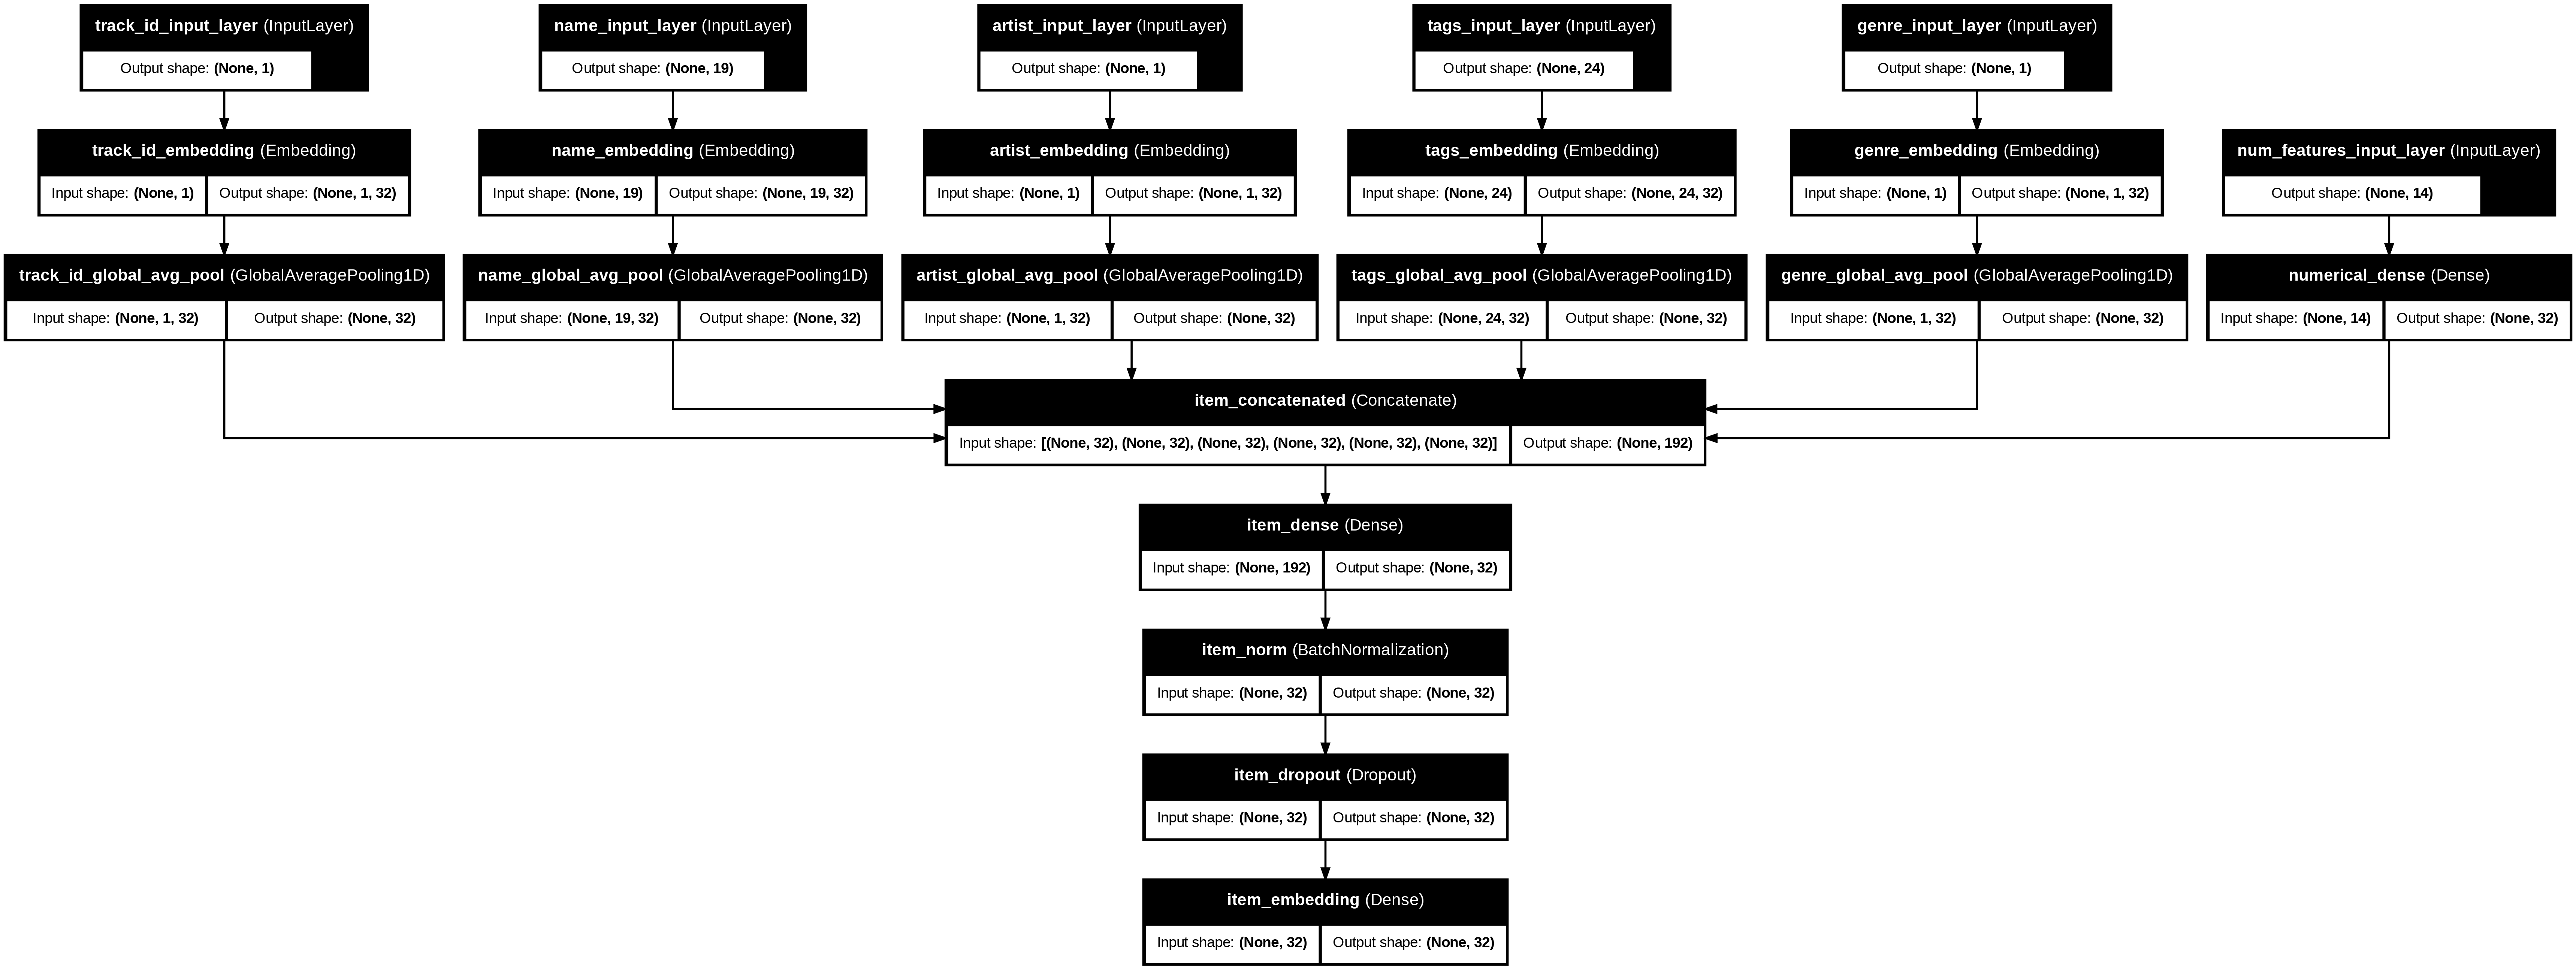

In [ ]:
plot_model(item_model, to_file='item_model.png', show_shapes=True, show_layer_names=True)

In [ ]:
def user_tower(inputs):
    user_id_input, playcount_input = inputs

    x_user_id = GlobalAveragePooling1D(name='user_id_global_avg_pool')(Embedding(input_dim=num_unique_user_id, output_dim=32,
                          embeddings_regularizer=regularizers.l2(1e-3), name='user_id_embedding')(user_id_input))

    x_user = concatenate([x_user_id, playcount_input], name='user_concatenated')

    x_user = Dense(32, activation='relu', kernel_regularizer=regularizers.l2(1e-3), name='user_dense')(x_user)
    x_norm = BatchNormalization(name='user_norm')(x_user)
    x_norm = Dropout(0.3, name='user_dropout')(x_norm)
    user_embedding = Dense(32, activation='relu', kernel_regularizer=regularizers.l2(1e-3), name='user_embedding')(x_norm)

    return user_embedding

In [ ]:
user_tower_output = user_tower([user_id_input, playcount_input])
user_model = Model(inputs=[user_id_input, playcount_input], outputs=user_tower_output, name='user_tower')

In [ ]:
user_model.summary()

Model: "user_tower"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ user_id_input_layer       │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ user_id_embedding         │ (None, 1, 32)          │        278,496 │ user_id_input_layer[0… │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ user_id_global_avg_pool   │ (None, 32)             │              0 │ user_id_embedding[0][… │
│ (GlobalAveragePooling1D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ playcount_input_layer     │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ user_concatenated         │ (None, 33)             │              0 │ user_id_global_avg_po… │
│ (Concatenate)             │                        │                │ playcount_input_layer… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ user_dense (Dense)        │ (None, 32)             │          1,088 │ user_concatenated[0][… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ user_norm                 │ (None, 32)             │            128 │ user_dense[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ user_dropout (Dropout)    │ (None, 32)             │              0 │ user_norm[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ user_embedding (Dense)    │ (None, 32)             │          1,056 │ user_dropout[0][0]     │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 280,768 (1.07 MB)

 Trainable params: 280,704 (1.07 MB)

 Non-trainable params: 64 (256.00 B)

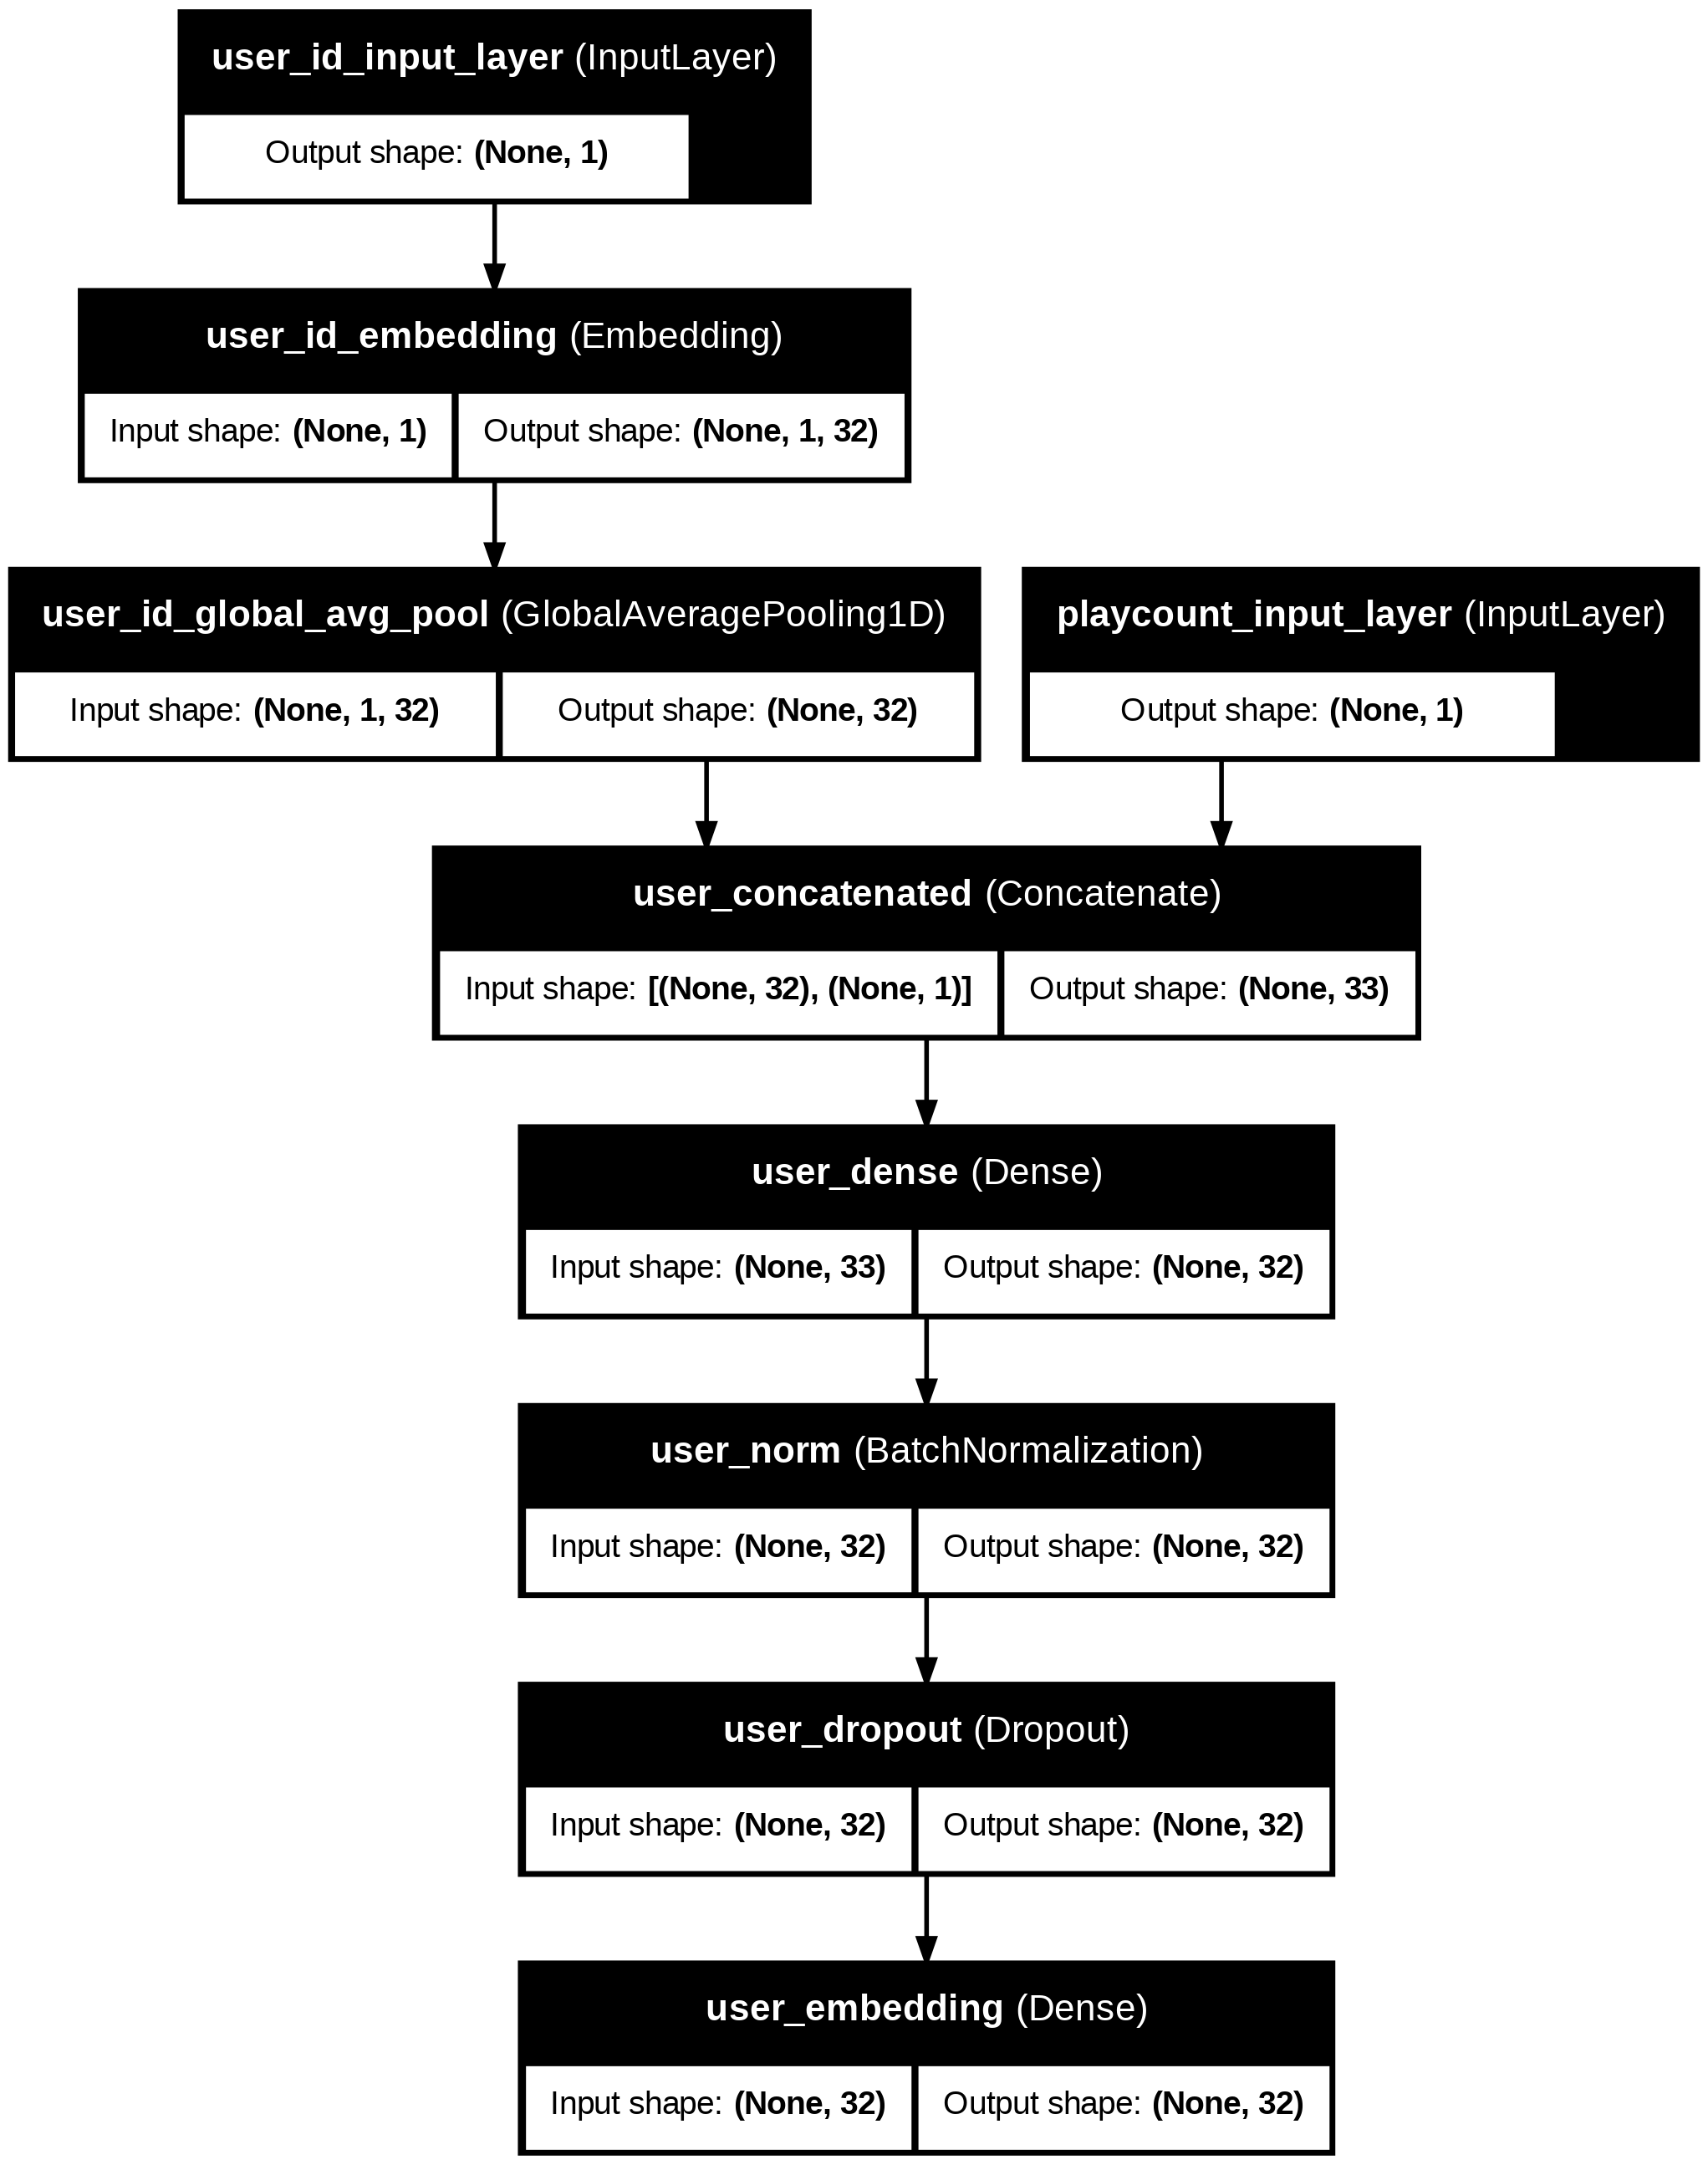

In [ ]:
plot_model(user_model, to_file='user_model.png', show_shapes=True, show_layer_names=True)

In [ ]:
item_embedding = item_tower([track_id_input, name_input, artist_input, tags_input, genre_input, num_features_input])
user_embedding = user_tower([user_id_input, playcount_input])

item_norm = BatchNormalization(name='item_norm2')(item_embedding)
user_norm = BatchNormalization(name='user_norm2')(user_embedding)

similarity = SimilarityLayer(name='similarity')([item_norm, user_norm])

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
new_optimizer = Adam(learning_rate=1e-4)

In [ ]:
two_tower_model = Model(inputs=[track_id_input, name_input, artist_input, tags_input, genre_input, num_features_input,
                      user_id_input, playcount_input],
              outputs=similarity, name='Two_Tower_Model')

In [ ]:
# two_tower_model = tf.keras.models.load_model('/content/drive/MyDrive/THESIS/FINAL/two_tower_model_without_album.keras', custom_objects={'SimilarityLayer': SimilarityLayer})

In [ ]:
from tensorflow.keras.utils import plot_model

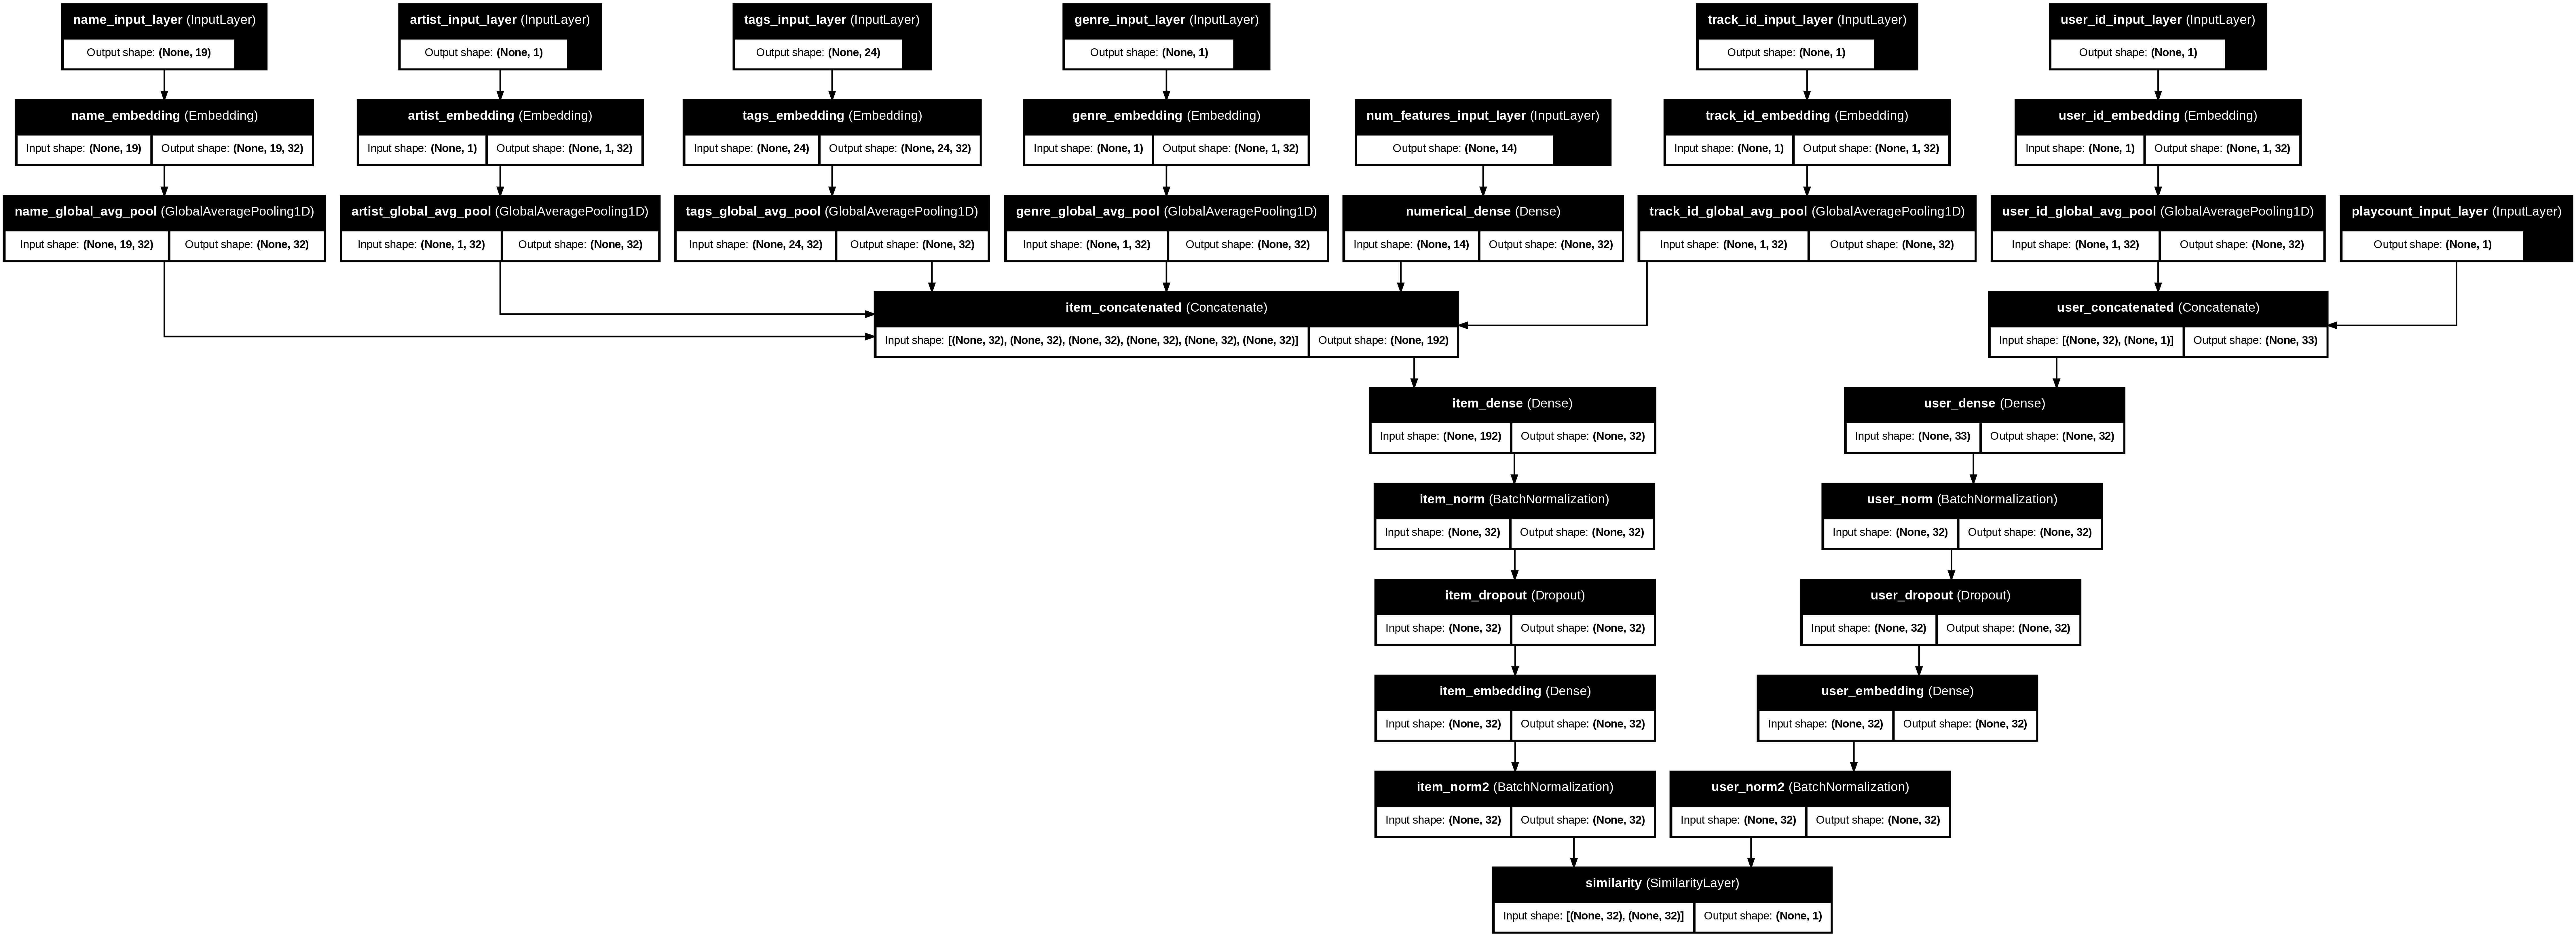

In [ ]:
plot_model(two_tower_model, to_file='two_tower_model.png', show_shapes=True, show_layer_names=True)

In [ ]:
two_tower_model.compile(optimizer=new_optimizer, loss='binary_crossentropy')

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-5
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

checkpoint_filepath = '/content/drive/MyDrive/THESIS/FINAL/ckpt/two_tower_model_without_albumcheckpoint.weights.h5'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='max',
    save_best_only=True)

In [ ]:
history = two_tower_model.fit(
    [X_train_track_id, X_train_name, X_train_artist, X_train_tags, X_train_genre, X_train_num_feats, X_train_user_id, X_train_playcount],
    y_train,
    epochs=70,
    batch_size=32,
    validation_data=([X_val_track_id, X_val_name, X_val_artist, X_val_tags, X_val_genre, X_val_num_feats, X_val_user_id, X_val_playcount], y_val),
    callbacks=[reduce_lr, early_stopping, model_checkpoint_callback]
)

Epoch 1/70
3264/3264 ━━━━━━━━━━━━━━━━━━━━ 49s 13ms/step - loss: 5.0860 - val_loss: 4.4730 - learning_rate: 1.0000e-04
Epoch 2/70
3264/3264 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - loss: 4.8093 - val_loss: 4.2141 - learning_rate: 1.0000e-04
Epoch 3/70
3264/3264 ━━━━━━━━━━━━━━━━━━━━ 78s 12ms/step - loss: 4.5963 - val_loss: 4.1765 - learning_rate: 1.0000e-04
Epoch 4/70
3264/3264 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - loss: 4.4395 - val_loss: 4.1090 - learning_rate: 1.0000e-04
Epoch 5/70
3264/3264 ━━━━━━━━━━━━━━━━━━━━ 82s 13ms/step - loss: 4.2318 - val_loss: 3.9948 - learning_rate: 1.0000e-04
Epoch 6/70
3264/3264 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - loss: 4.0962 - val_loss: 3.9160 - learning_rate: 1.0000e-04
Epoch 7/70
3264/3264 ━━━━━━━━━━━━━━━━━━━━ 44s 13ms/step - loss: 4.0010 - val_loss: 3.8028 - learning_rate: 1.0000e-04
Epoch 8/70
3264/3264 ━━━━━━━━━━━━━━━━━━━━ 45s 14ms/step - loss: 3.8567 - val_loss: 3.7000 - learning_rate: 1.0000e-04
Epoch 9/70
3264/3264 ━━━━━━━━━━━━━━━━━━━━ 81s 13ms/step 

In [ ]:
from matplotlib import pyplot as plt

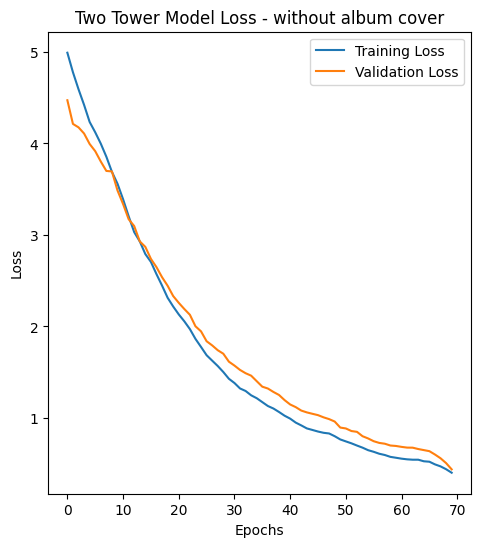

In [ ]:
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Two Tower Model Loss - without album cover')
plt.legend()

In [ ]:
# two_tower_model.save('/content/drive/MyDrive/THESIS/FINAL/two_tower_model_without_album.h5')

In [ ]:
# two_tower_model.save('/content/drive/MyDrive/THESIS/FINAL/two_tower_model_without_album.keras')

In [ ]:
filtered_data = merged_data[['track_id', 'name', 'artist', 'tags', 'genre'] + num_features]
filtered_data = filtered_data.drop_duplicates(subset='track_id', keep='first')

In [ ]:
for layer in two_tower_model.layers:
    print(layer.name)

track_id_input_layer
name_input_layer
artist_input_layer
tags_input_layer
genre_input_layer
user_id_input_layer
track_id_embedding
name_embedding
artist_embedding
tags_embedding
genre_embedding
num_features_input_layer
user_id_embedding
track_id_global_avg_pool
name_global_avg_pool
artist_global_avg_pool
tags_global_avg_pool
genre_global_avg_pool
numerical_dense
user_id_global_avg_pool
playcount_input_layer
item_concatenated
user_concatenated
item_dense
user_dense
item_norm
user_norm
item_dropout
user_dropout
item_embedding
user_embedding
item_norm2
user_norm2
similarity


In [ ]:
user_embedding_layer = two_tower_model.get_layer('user_norm2')
user_embedding_model = Model(inputs=user_model.input, outputs=user_embedding_layer.output)

In [ ]:
def get_user_embedding(user_id):

    filtered_data = merged_data[merged_data['user_id'] == user_id]
    user_input = [
        np.array(filtered_data['user_id']).astype('int32'),
        np.array(filtered_data['playcount']).astype('float32')
    ]

    user_embedding = user_embedding_model.predict(user_input)
    user_embedding_norm = user_embedding / np.linalg.norm(user_embedding)
    return user_embedding_norm

In [ ]:
item_embedding_layer = two_tower_model.get_layer('item_norm2')
item_embedding_model = Model(inputs=item_model.input, outputs=item_embedding_layer.output)

In [ ]:
def get_item_embeddings():

  item_input = [
      np.array(filtered_data['track_id']).astype('int32'),
      pad_sequences(filtered_data['name'], maxlen=max_len_name),
      np.array(filtered_data['artist']).astype('int32'),
      pad_sequences(filtered_data['tags'], maxlen=max_len_tags),
      np.array(filtered_data['genre']).astype('int32'),
      np.array(filtered_data[num_features]).astype('float32')
  ]

  item_embedding = item_embedding_model.predict(item_input)
  item_embedding_norm = item_embedding / np.linalg.norm(item_embedding)

  return item_embedding_norm

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
def recommendations(user_id, top_k=10, track_ids=None):
    # user embedding for user id
    user_embedding = get_user_embedding(user_id)

    # get all item embeddings
    item_embeddings = get_item_embeddings()

    # similarity for user and item
    similarities = cosine_similarity(user_embedding, item_embeddings)

    # top k scores
    top_k_indices = np.argsort(similarities[0])[::-1][:top_k]

    # retrieve track_id
    if track_ids is not None:
        top_k_items = [track_ids[i] for i in top_k_indices]
    else:
        top_k_items = top_k_indices.tolist()

    return top_k_items, similarities[0][top_k_indices]

In [ ]:
item_embeddings = get_item_embeddings()

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [ ]:
item_embeddings

array([[ 0.00131915, -0.00175125, -0.00239455, ..., -0.00304011,
        -0.0036062 , -0.00257289],
       [ 0.00216685, -0.00146181, -0.00239455, ..., -0.00304011,
        -0.0036062 , -0.00257289],
       [ 0.00258701, -0.00188757, -0.00239455, ..., -0.00304011,
        -0.00303065, -0.00257289],
       ...,
       [-0.00310025,  0.00269886,  0.00763799, ..., -0.0025389 ,
        -0.00051606,  0.00465817],
       [-0.00310025,  0.00299668,  0.00559414, ..., -0.00166823,
        -0.00230581,  0.0017077 ],
       [-0.00310025,  0.00230109,  0.0030879 , ..., -0.00197766,
        -0.00243795, -0.00029956]], dtype=float32)

In [ ]:
track_ids = merged_data['track_id'].drop_duplicates().tolist()

In [ ]:
def hit_rate_at_k(df, k):
  track_ids = merged_data['track_id'].drop_duplicates().tolist()

  grouped = df.groupby('user_id')
  hit_rates = []

  for user_id, group in grouped:
    user_songs = group[group['user_id'] == user_id]
    user_listened = group[group['label'] == 1]

    rec_tracks, _ = recommendations(user_id, k, track_ids)
    listened_tracks = user_listened['track_id'].tolist()

    hit_rate = 0

    for track in rec_tracks:
      if track in listened_tracks:
        hit_rate = 1
        break

    hit_rates.append(hit_rate)

  return np.mean(hit_rates), hit_rates

In [ ]:
def recall_at_k(df, k):
  grouped = df.groupby('user_id')
  track_ids = merged_data['track_id'].drop_duplicates().tolist()
  recall_list = []

  for user_id, group in grouped:
    user_songs = group[group['user_id'] == user_id]
    user_listened = user_songs[user_songs['label'] == 1]

    rec_tracks, _ = recommendations(user_id, k, track_ids)
    listened_tracks = user_listened['track_id'].tolist()

    relevant_rec = [track for track in rec_tracks if track in listened_tracks]
    recall = len(relevant_rec) / len(listened_tracks) if len(listened_tracks) > 0 else 0
    recall_list.append(recall)

  return np.mean(recall_list), recall_list

In [ ]:
testing_data = test_data[test_data['user_id'].isin(test_data['user_id'].unique()[:500])]

In [ ]:
testing_data_new = val_data[val_data['user_id'].isin(val_data['user_id'].unique()[:500])]

In [ ]:
tes_user_embedding = get_user_embedding(1713)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


In [ ]:
tes_user_embedding

array([[-4.44074087e-02,  3.47901927e-03, -1.54941818e-02,
        -2.46431679e-02, -6.80228323e-02, -1.11434180e-02,
        -6.94526285e-02, -6.40120581e-02, -5.44046722e-02,
        -5.18587828e-02, -5.55922687e-02, -1.76749732e-02,
        -6.24690391e-02, -4.95071709e-02, -1.53411916e-02,
         2.67010648e-02, -4.82161529e-02,  4.84531187e-03,
         3.91661115e-02, -1.20942695e-02, -6.99495226e-02,
        -4.75100353e-02, -3.60559896e-02, -4.47560707e-03,
        -2.50088628e-02,  5.70193306e-03, -4.07085717e-02,
         2.12579127e-02, -1.78919546e-02, -7.33452430e-03,
        -6.91983104e-02, -1.44578060e-02],
       [-4.44074087e-02,  3.47901927e-03, -1.54941818e-02,
        -2.46431679e-02, -6.80228323e-02, -1.11434180e-02,
        -6.94526285e-02, -6.40120581e-02, -5.44046722e-02,
        -5.18587828e-02, -5.55922687e-02, -1.76749732e-02,
        -6.24690391e-02, -4.95071709e-02, -1.53411916e-02,
         2.67010648e-02, -4.82161529e-02,  4.84531187e-03,
         3.91

In [ ]:
testing_data

track_id                   name artist  \
143294      313             [4343, 10]   1223   
163855     1101             [3465, 35]    990   
57729       973        [2498, 162, 36]    372   
114883     3210              [1, 2830]   1394   
81508      3719  [4561, 211, 178, 296]     27   
...         ...                    ...    ...   
42767       519                   [77]   1368   
24684      4999                 [2228]   1320   
8445       1984       [23, 181, 19, 8]    835   
46281      4465         [13, 131, 472]   1479   
18212      4176         [96, 112, 719]    918   

                                                     tags genre      year  \
143294                                               [29]     2  0.915966   
163855                            [30, 8, 18, 92, 99, 27]     2  0.882353   
57729                                         [71, 3, 65]     2  0.957983   
114883                                   [25, 63, 61, 93]     4  0.882353   
81508                                         [6, 49, 41]    10  0.857143   
...                                                   ...   ...       ...   
42767                                        [30, 23, 29]     2  0.899160   
24684                                        [25, 77, 61]     4  0.907563   
8445    [71, 43, 12, 25, 45, 52, 97, 63, 61, 76, 59, 7...     6  0.924370   
46281                                            [30, 48]     2  0.915966   
18212                                        [71, 33, 72]     6  0.882353   

        duration_ms  danceability    energy  loudness  ...  instrumentalness  \
143294     0.295240      0.569620  0.655993  0.746823  ...          0.848089   
163855     0.120776      0.609246  0.532991  0.700280  ...          0.674044   
57729      0.207764      0.717116  0.053781  0.533895  ...          0.951710   
114883     0.159095      0.460649  0.966999  0.918254  ...          0.000259   
81508      0.119603      0.509081  0.764995  0.897216  ...          0.000000   
...             ...           ...       ...       ...  ...               ...   
42767      0.134381      0.690699  0.869997  0.867267  ...          0.236419   
24684      0.165744      0.445239  0.939999  0.914458  ...          0.019718   
8445       0.164386      0.541002  0.602992  0.855301  ...          0.000000   
46281      0.215216      0.393506  0.843997  0.742542  ...          0.816901   
18212      0.175516      0.487067  0.954999  0.907307  ...          0.000002   

        liveness   valence     tempo       key  mode  time_signature  user_id  \
143294  0.198461  0.029905  0.497696  0.363636   0.0            0.75      990   
163855  0.148560  0.390890  0.448513  0.272727   0.0            0.75     1807   
57729   0.084104  0.788136  0.748390  0.909091   0.0            0.75     7186   
114883  0.097619  0.338942  0.317399  1.000000   0.0            0.75     6150   
81508   0.198461  0.435707  0.479158  0.818182   0.0            0.75     8198   
...          ...       ...       ...       ...   ...             ...      ...   
42767   0.016010  0.938885  0.462204  0.090909   1.0            0.75     3560   
24684   0.372076  0.481543  0.453983  0.181818   0.0            0.75     2260   
8445    0.136085  0.229954  0.562574  0.727273   1.0            0.75     4267   
46281   0.621582  0.098558  0.368264  0.454545   0.0            0.75     2514   
18212   0.126728  0.508026  0.290187  0.000000   1.0            0.75     3618   

        playcount  label  
143294   0.000000      0  
163855   0.000000      0  
57729    0.002198      1  
114883   0.000000      0  
81508    0.002198      1  
...           ...    ...  
42767    0.004396      1  
24684    0.002198      1  
8445     0.004396      1  
46281    0.004396      1  
18212    0.002198      1  

[1243 rows x 22 columns]

In [ ]:
testing_data_new

track_id                       name artist  \
83154      3552           [1, 266, 2, 393]   1599   
112488      894         [995, 2412, 1, 84]   1459   
13386      3999                 [707, 647]    112   
97491      3797                  [22, 599]   1581   
143221      148                     [5119]   1559   
...         ...                        ...    ...   
8148        354                      [960]    850   
8698       1439              [438, 2, 806]    838   
75576      4579             [92, 138, 153]    607   
124084     5012        [769, 88, 176, 154]    714   
132473      688  [870, 6, 5142, 2, 1, 318]    571   

                                tags genre      year  duration_ms  \
83154                       [49, 59]    10  0.899160     0.171781   
112488              [78, 77, 76, 94]     4  0.857143     0.246535   
13386                    [71, 23, 4]     6  0.915966     0.139092   
97491           [30, 79, 29, 95, 93]     2  0.890756     0.193044   
143221           [30, 8, 18, 47, 48]     2  0.806723     0.111782   
...                              ...   ...       ...          ...   
8148    [49, 71, 33, 89, 15, 18, 50]     6  0.899160     0.156400   
8698                [86, 71, 33, 89]     6  0.899160     0.220923   
75576            [6, 49, 51, 15, 50]    10  0.907563     0.204184   
124084                   [86, 7, 43]    10  0.882353     0.164298   
132473               [86, 7, 32, 45]    10  0.815126     0.078710   

        danceability    energy  loudness  ...  instrumentalness  liveness  \
83154       0.500275  0.573991  0.802949  ...          0.000000  0.177669   
112488      0.456247  0.929999  0.831578  ...          0.000485  0.123610   
13386       0.673088  0.952999  0.890712  ...          0.000028  0.027030   
97491       0.569620  0.648993  0.784827  ...          0.006167  0.073188   
143221      0.277931  0.187984  0.625084  ...          0.875252  0.095540   
...              ...       ...       ...  ...               ...       ...   
8148        0.742433  0.507990  0.799315  ...          0.000002  0.097619   
8698        0.449642  0.411988  0.760085  ...          0.064386  0.309700   
75576       0.404513  0.735995  0.808017  ...          0.007223  0.325294   
124084      0.516786  0.853997  0.872197  ...          0.000004  0.124649   
132473      0.503577  0.910998  0.821973  ...          0.001781  0.376235   

         valence     tempo       key  mode  time_signature  user_id  \
83154   0.178007  0.571335  0.181818   1.0            0.75     2519   
112488  0.427559  0.628466  0.545455   1.0            0.75     4362   
13386   0.503952  0.562770  0.000000   0.0            0.75     7443   
97491   0.532472  0.813562  0.000000   1.0            0.50     5045   
143221  0.063417  0.486773  0.545455   1.0            0.00      241   
...          ...       ...       ...   ...             ...      ...   
8148    0.522287  0.262468  1.000000   0.0            0.75     7443   
8698    0.422466  0.576444  0.818182   1.0            0.50      195   
75576   0.428577  0.584873  0.818182   0.0            0.75     4155   
124084  0.492748  0.339251  0.454545   1.0            0.75     2795   
132473  0.539602  0.304609  0.181818   1.0            0.75     1373   

        playcount  label  
83154    0.002198      1  
112488   0.000000      0  
13386    0.002198      1  
97491    0.000000      0  
143221   0.000000      0  
...           ...    ...  
8148     0.002198      1  
8698     0.002198      1  
75576    0.002198      1  
124084   0.000000      0  
132473   0.000000      0  

[2000 rows x 22 columns]

#### testing with validation data

In [ ]:
hit_rate_1, hit_rates_1 = hit_rate_at_k(testing_data_new, k=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
162/162 ━━━━━━

In [ ]:
hit_rate_10, hit_rates_10 = hit_rate_at_k(testing_data_new, k=10)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
162/162 ━━━━━━

In [ ]:
hit_rate_50, hit_rates_50 = hit_rate_at_k(testing_data_new, k=50)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
162/162 ━━━━━━

In [ ]:
hit_rate_100, hit_rates_100 = hit_rate_at_k(testing_data_new, k=100)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━

In [ ]:
print(f"HitRate@1: {hit_rate_1}")
print(f"HitRate@10: {hit_rate_10}")
print(f"HitRate@50: {hit_rate_50}")
print(f"HitRate@100: {hit_rate_100}")

HitRate@1: 0.004
HitRate@10: 0.05
HitRate@50: 0.238
HitRate@100: 0.368


In [ ]:
recall_1, recalls_1 = recall_at_k(testing_data_new, k=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
162/162 ━━━━━━

In [ ]:
recall_10, recalls_10 = recall_at_k(testing_data_new, k=10)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
162/162 ━━━━━━

In [ ]:
recall_50, recalls_50 = recall_at_k(testing_data_new, k=50)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
162/162 ━━━━━━

In [ ]:
recall_100, recalls_100 = recall_at_k(testing_data_new, k=100)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
162/162 ━━━━━━

In [ ]:
print(f"Recall@1: {recall_1}")
print(f"Recall@10: {recall_10}")
print(f"Recall@50: {recall_50}")
print(f"Recall@100: {recall_100}")

Recall@1: 0.002
Recall@10: 0.025
Recall@50: 0.131
Recall@100: 0.217


#### testing with test data

In [ ]:
hit_rate_1_test, hit_rates_1_test = hit_rate_at_k(testing_data, k=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
162/162 ━━━━━━

In [ ]:
hit_rate_10_test, hit_rates_10_test = hit_rate_at_k(testing_data, k=10)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
162/162 ━━━━━━

In [ ]:
hit_rate_50_test, hit_rates_50_test = hit_rate_at_k(testing_data, k=50)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
162/162 ━━━━━━

In [ ]:
hit_rate_100_test, hit_rates_100_test = hit_rate_at_k(testing_data, k=100)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
162/162 ━━━━━━

In [ ]:
print(f"HitRate@1: {hit_rate_1_test}")
print(f"HitRate@10: {hit_rate_10_test}")
print(f"HitRate@50: {hit_rate_50_test}")
print(f"HitRate@100: {hit_rate_100_test}")

HitRate@1: 0.002
HitRate@10: 0.026
HitRate@50: 0.164
HitRate@100: 0.282


In [ ]:
recall_1_test, recalls_1_test = recall_at_k(testing_data, k=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
162/162 ━━━━━━

In [ ]:
recall_10_test, recalls_10_test = recall_at_k(testing_data, k=10)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
162/162 ━━━━━━

In [ ]:
recall_50_test, recalls_50_test = recall_at_k(testing_data, k=50)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
162/162 ━━━━━━

In [ ]:
recall_100_test, recalls_100_test = recall_at_k(testing_data, k=100)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
162/162 ━━━━━━

In [ ]:
print(f"Recall@1: {recall_1_test}")
print(f"Recall@10: {recall_10_test}")
print(f"Recall@50: {recall_50_test}")
print(f"Recall@100: {recall_100_test}")

Recall@1: 0.001
Recall@10: 0.015
Recall@50: 0.124
Recall@100: 0.212


In [ ]:
two_tower_model.save('/content/drive/MyDrive/THESIS/FINAL/two_tower_model_without_album.h5')

In [ ]:
two_tower_model.save('/content/drive/MyDrive/THESIS/FINAL/two_tower_model_without_album.keras')

# HIT RATE & RECALL

In [ ]:
# from tensorflow.keras.models import load_model

In [ ]:
# model = load_model('/content/drive/MyDrive/THESIS/FINAL/two_tower_model.h5', custom_objects={'SimilarityLayer': SimilarityLayer})
# model = load_model('/content/drive/MyDrive/Thesis/Model/two_tower_model.h5', custom_objects={'SimilarityLayer': SimilarityLayer}) #yujin
# model_album = load_model('/content/drive/MyDrive/THESIS/FINAL/two_tower_model.h5', custom_objects={'SimilarityLayer': SimilarityLayer})

In [ ]:
# merged_data.head()

In [ ]:
# X_track_id = np.array(merged_data['track_id']).astype('int32')

# X_name = pad_sequences(merged_data['name'], maxlen=max_len_name)

# X_artist = np.array(merged_data['artist']).astype('int32')

# X_tags = pad_sequences(merged_data['tags'], maxlen=max_len_tags)

# X_genre = np.array(merged_data['genre']).astype('int32')

# X_num_feats = np.array(merged_data[num_features])

# X_user_id = np.array(merged_data['user_id']).astype('int32')

# X_playcount= np.array(merged_data['playcount'])

In [ ]:
# all_pred = model.predict([
#     X_test_track_id,
#     X_test_name,
#     X_test_artist,
#     X_test_tags,
#     X_test_genre,
#     X_test_num_feats,
#     X_test_user_id,
#     X_test_playcount
# ])

In [ ]:
# predicted_df = pd.DataFrame(all_pred, columns=['predicted_prob'])
# predicted_df['user_id'] = X_test_user_id
# predicted_df['track_id'] = X_test_track_id

In [ ]:
# predicted_df

In [ ]:
# def top_k_recs(user_id, k):
#   user_pred = predicted_df[predicted_df['user_id'] == user_id]

#   user_pred_sorted = user_pred.sort_values(by='predicted_prob', ascending=False)

#   top_k_songs = user_pred_sorted.head(k)

#   return top_k_songs[['user_id', 'track_id', 'predicted_prob']]

In [ ]:
# # user id = 1421
# top_rec_for_user = top_k_recs(user_id=2790, k=10)

In [ ]:
# top_rec_for_user

In [ ]:
# user_songs = merged_data[merged_data['user_id'] == 2790]
# user_listened = user_songs[user_songs['label'] == 1]

In [ ]:
# user_listened[['user_id', 'track_id']]

In [ ]:
# user_songss = test_data[test_data['user_id'] == 2790]
# user_listeneds = user_songss[user_songss['label'] == 1]
# user_not_listened = user_songss[user_songss['label'] == 0]

In [ ]:
# test_data[test_data['user_id'] == 2790]

In [ ]:
# user_listeneds[['user_id', 'track_id']]

In [ ]:
# user_not_listened[['user_id', 'track_id']]

In [ ]:
# rec_tracks = top_rec_for_user['track_id'].tolist()
# listened_tracks = user_listened['track_id'].tolist()

In [ ]:
# print(f"Recommendations : {rec_tracks}")
# print(f"Listened Tracks : {listened_tracks}")

In [ ]:
# hit = 0
# for track in rec_tracks:
#   if track in listened_tracks:
#     hit += 1
#     break
# print(f"Hit ? : {hit}")

In [ ]:
# relevant_rec = [track for track in rec_tracks if track in listened_tracks]
# print(f"Relevant Tracks : {relevant_rec}")

In [ ]:
# print(f"Total Relevant Tracks : {len(relevant_rec)}")
# print(f"Total Listened Tracks : {len(listened_tracks)}")

In [ ]:
# recall = len(relevant_rec) / len(listened_tracks) if len(listened_tracks) > 0 else 0
# print(f"Recall : {recall}")

In [ ]:
# def hit_rate_at_k(df, k):
#   grouped = df.groupby('user_id')
#   hit_rates = []

#   for user_id, group in grouped:
#     user_songs = group[group['user_id'] == user_id]
#     user_listened = group[group['label'] == 1]

#     rec_tracks = top_k_recs(user_id, k)['track_id'].tolist()
#     listened_tracks = user_listened['track_id'].tolist()

#     hit_rate = 0

#     for track in rec_tracks:
#       if track in listened_tracks:
#         hit_rate = 1
#         break

#     hit_rates.append(hit_rate)

#   return np.mean(hit_rates), hit_rates

In [ ]:
# def recall_at_k(df, k):
#   grouped = df.groupby('user_id')
#   recall_list = []

#   for user_id, group in grouped:
#     user_songs = group[group['user_id'] == user_id]
#     user_listened = user_songs[user_songs['label'] == 1]

#     rec_tracks = top_k_recs(user_id, k)['track_id'].tolist()
#     listened_tracks = user_listened['track_id'].tolist()

#     relevant_rec = [track for track in rec_tracks if track in listened_tracks]
#     recall = len(relevant_rec) / len(listened_tracks) if len(listened_tracks) > 0 else 0
#     recall_list.append(recall)

#   return np.mean(recall_list), recall_list

In [ ]:
# test_data

In [ ]:
# test_data[['user_id', 'label']].sort_values(by='user_id')

In [ ]:
# k=10

In [ ]:
# k1 = 3
# hit_rate, hit_rates = hit_rate_at_k(test_data, k)

In [ ]:
# hit_rate, hit_rates = hit_rate_at_k(test_data, k)

In [ ]:
# print(f"HitRate@{k}: {hit_rate}")

In [ ]:
# hit_rates

In [ ]:
# recall, recalls = recall_at_k(test_data, k)

In [ ]:
# print(f"Recall@{k}: {recall}")

In [ ]:
# recalls